# joblib test


In [1]:
import cpuinfo
print(cpuinfo.get_cpu_info()['brand_raw'])

12th Gen Intel(R) Core(TM) i5-12400


### joblib無し CPUバウンド 単純関数

In [ ]:
import time
import numpy as np
from joblib import Parallel, delayed

def countdown(n):
    while n > 0:
        n -= 1
    return 'end'

CPU_COUNT = 1
TIMES = 50
N = 50000000


start = time.time()

for _ in range(TIMES):
    countdown(N)

print(time.time()-start)


- TIMES = 100
N = 10000000
20.694905519485474
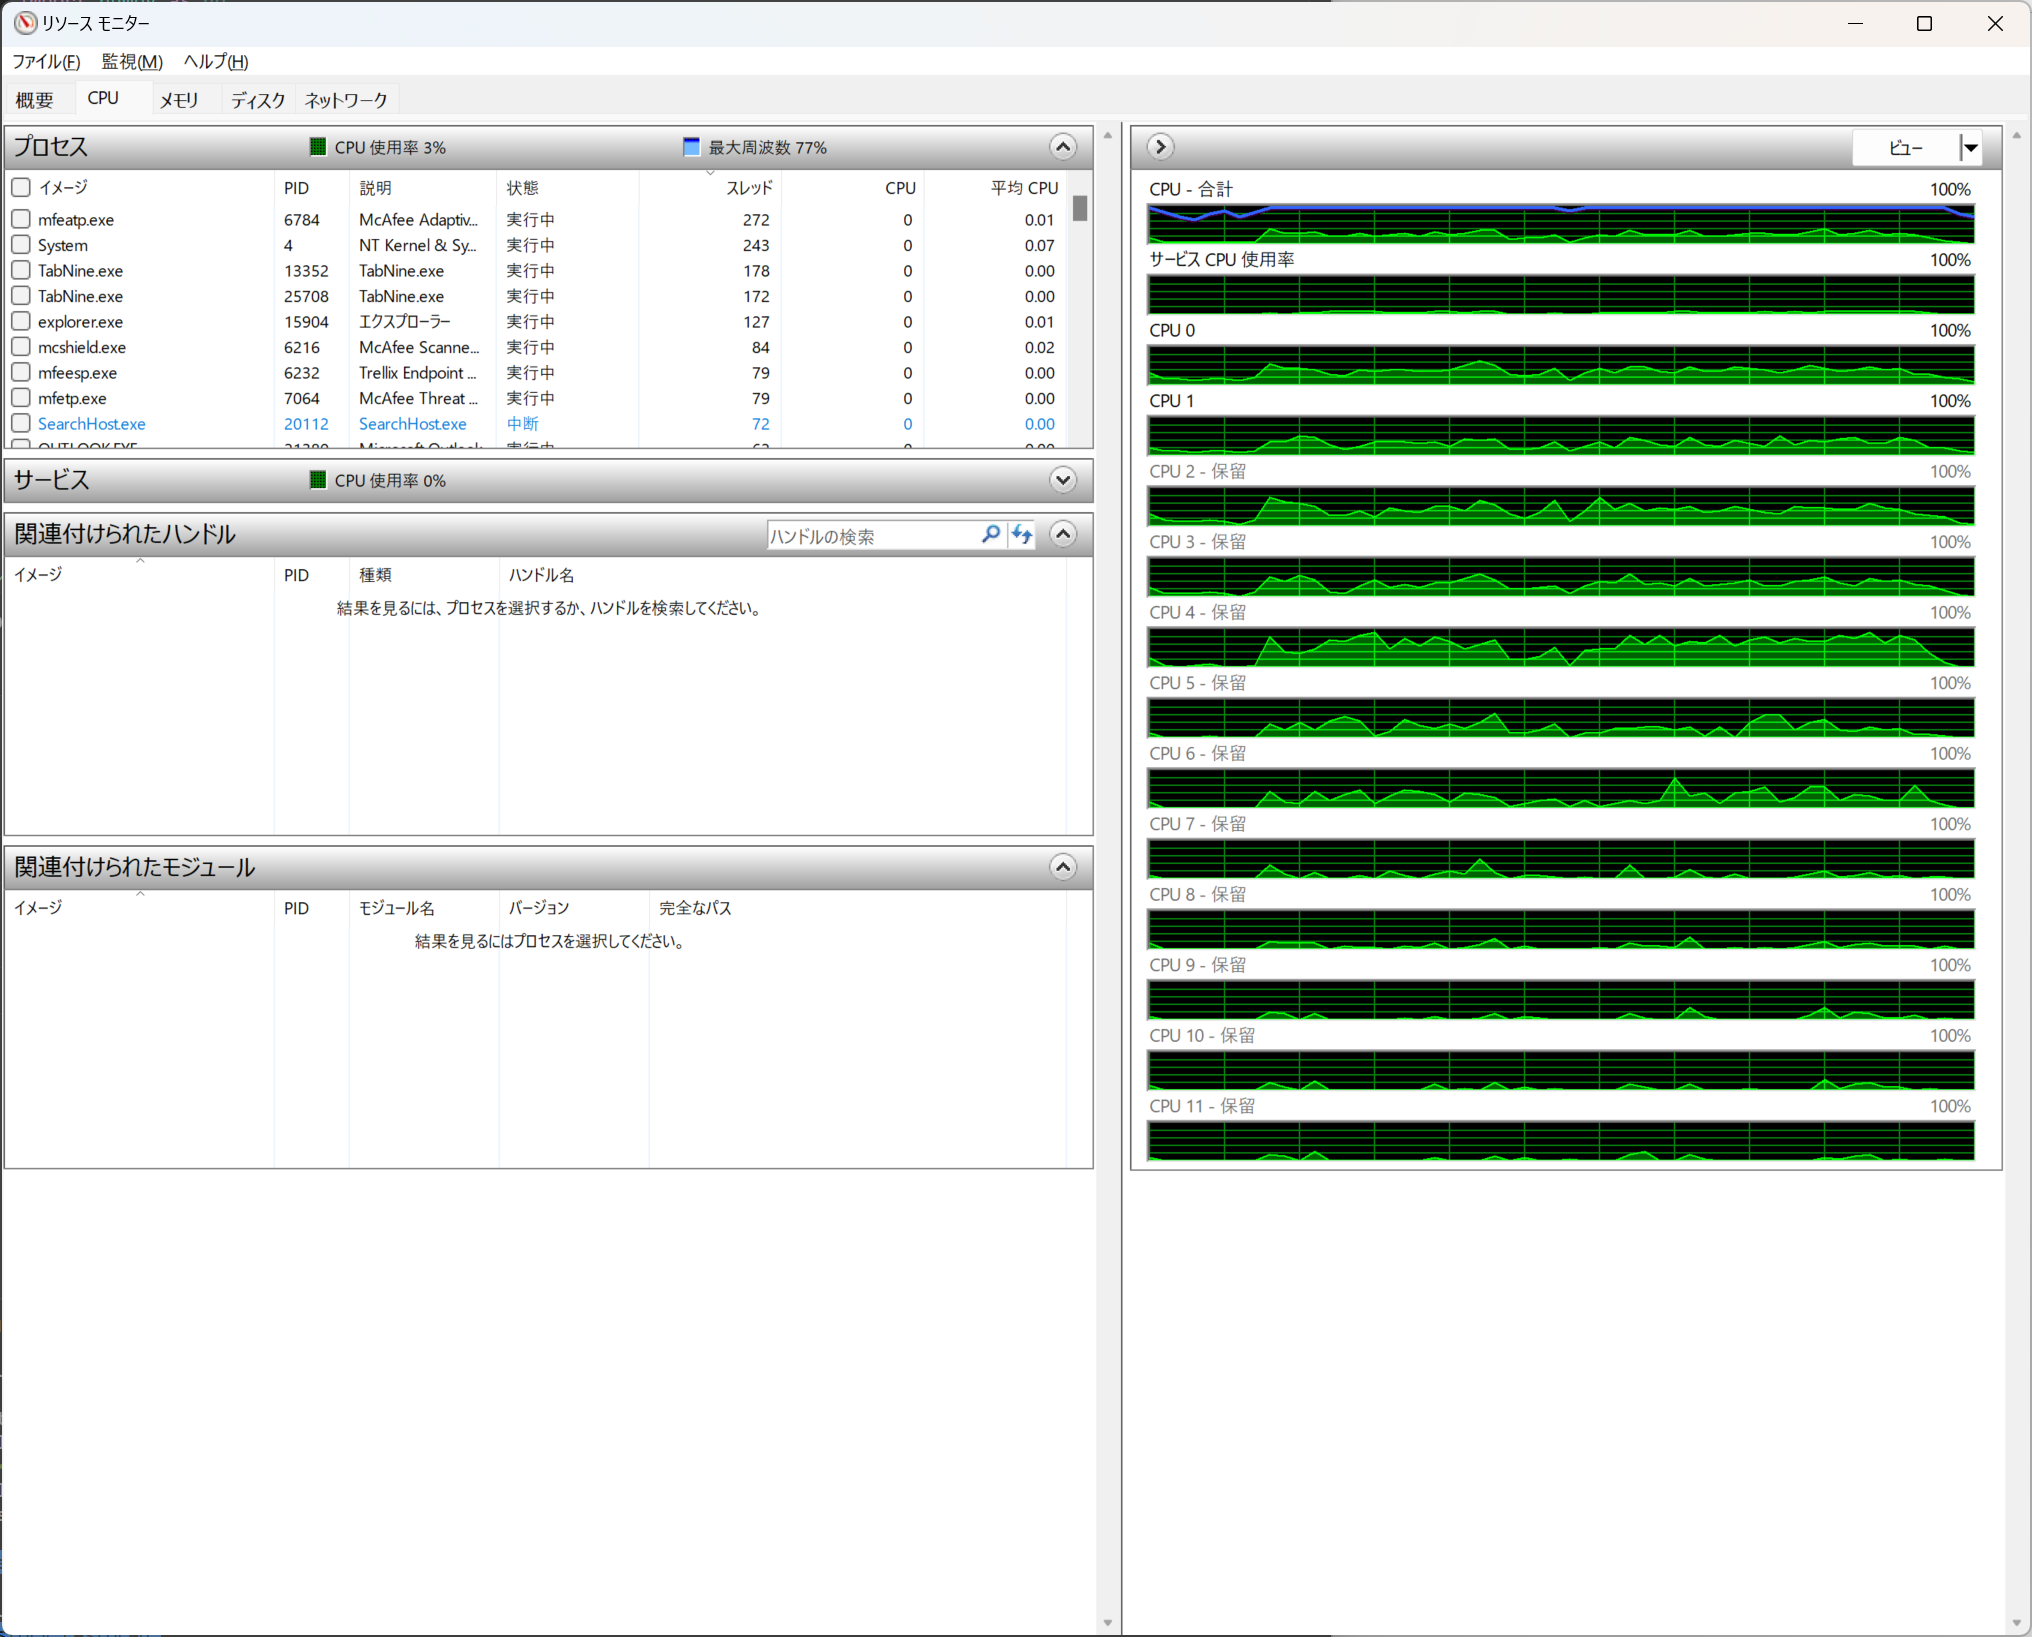
- TIMES = 50
N = 50000000
51.59138774871826

### joblib CPUバウンド 

In [ ]:
import time
import numpy as np
from joblib import Parallel, delayed

def countdown(n):
    while n > 0:
        n -= 1
    return 'end'

CPU_COUNT = 4
TIMES = 100
N = 1

start = time.time()
for result in Parallel(n_jobs=CPU_COUNT) ([delayed(countdown) (N) for _ in range(TIMES)]):
    pass

print(time.time()-start)


- CPU_COUNT = 1
TIMES = 100
N = 10000000
21.238336086273193

- CPU_COUNT = 2
TIMES = 100
N = 10000000
17.947431802749634
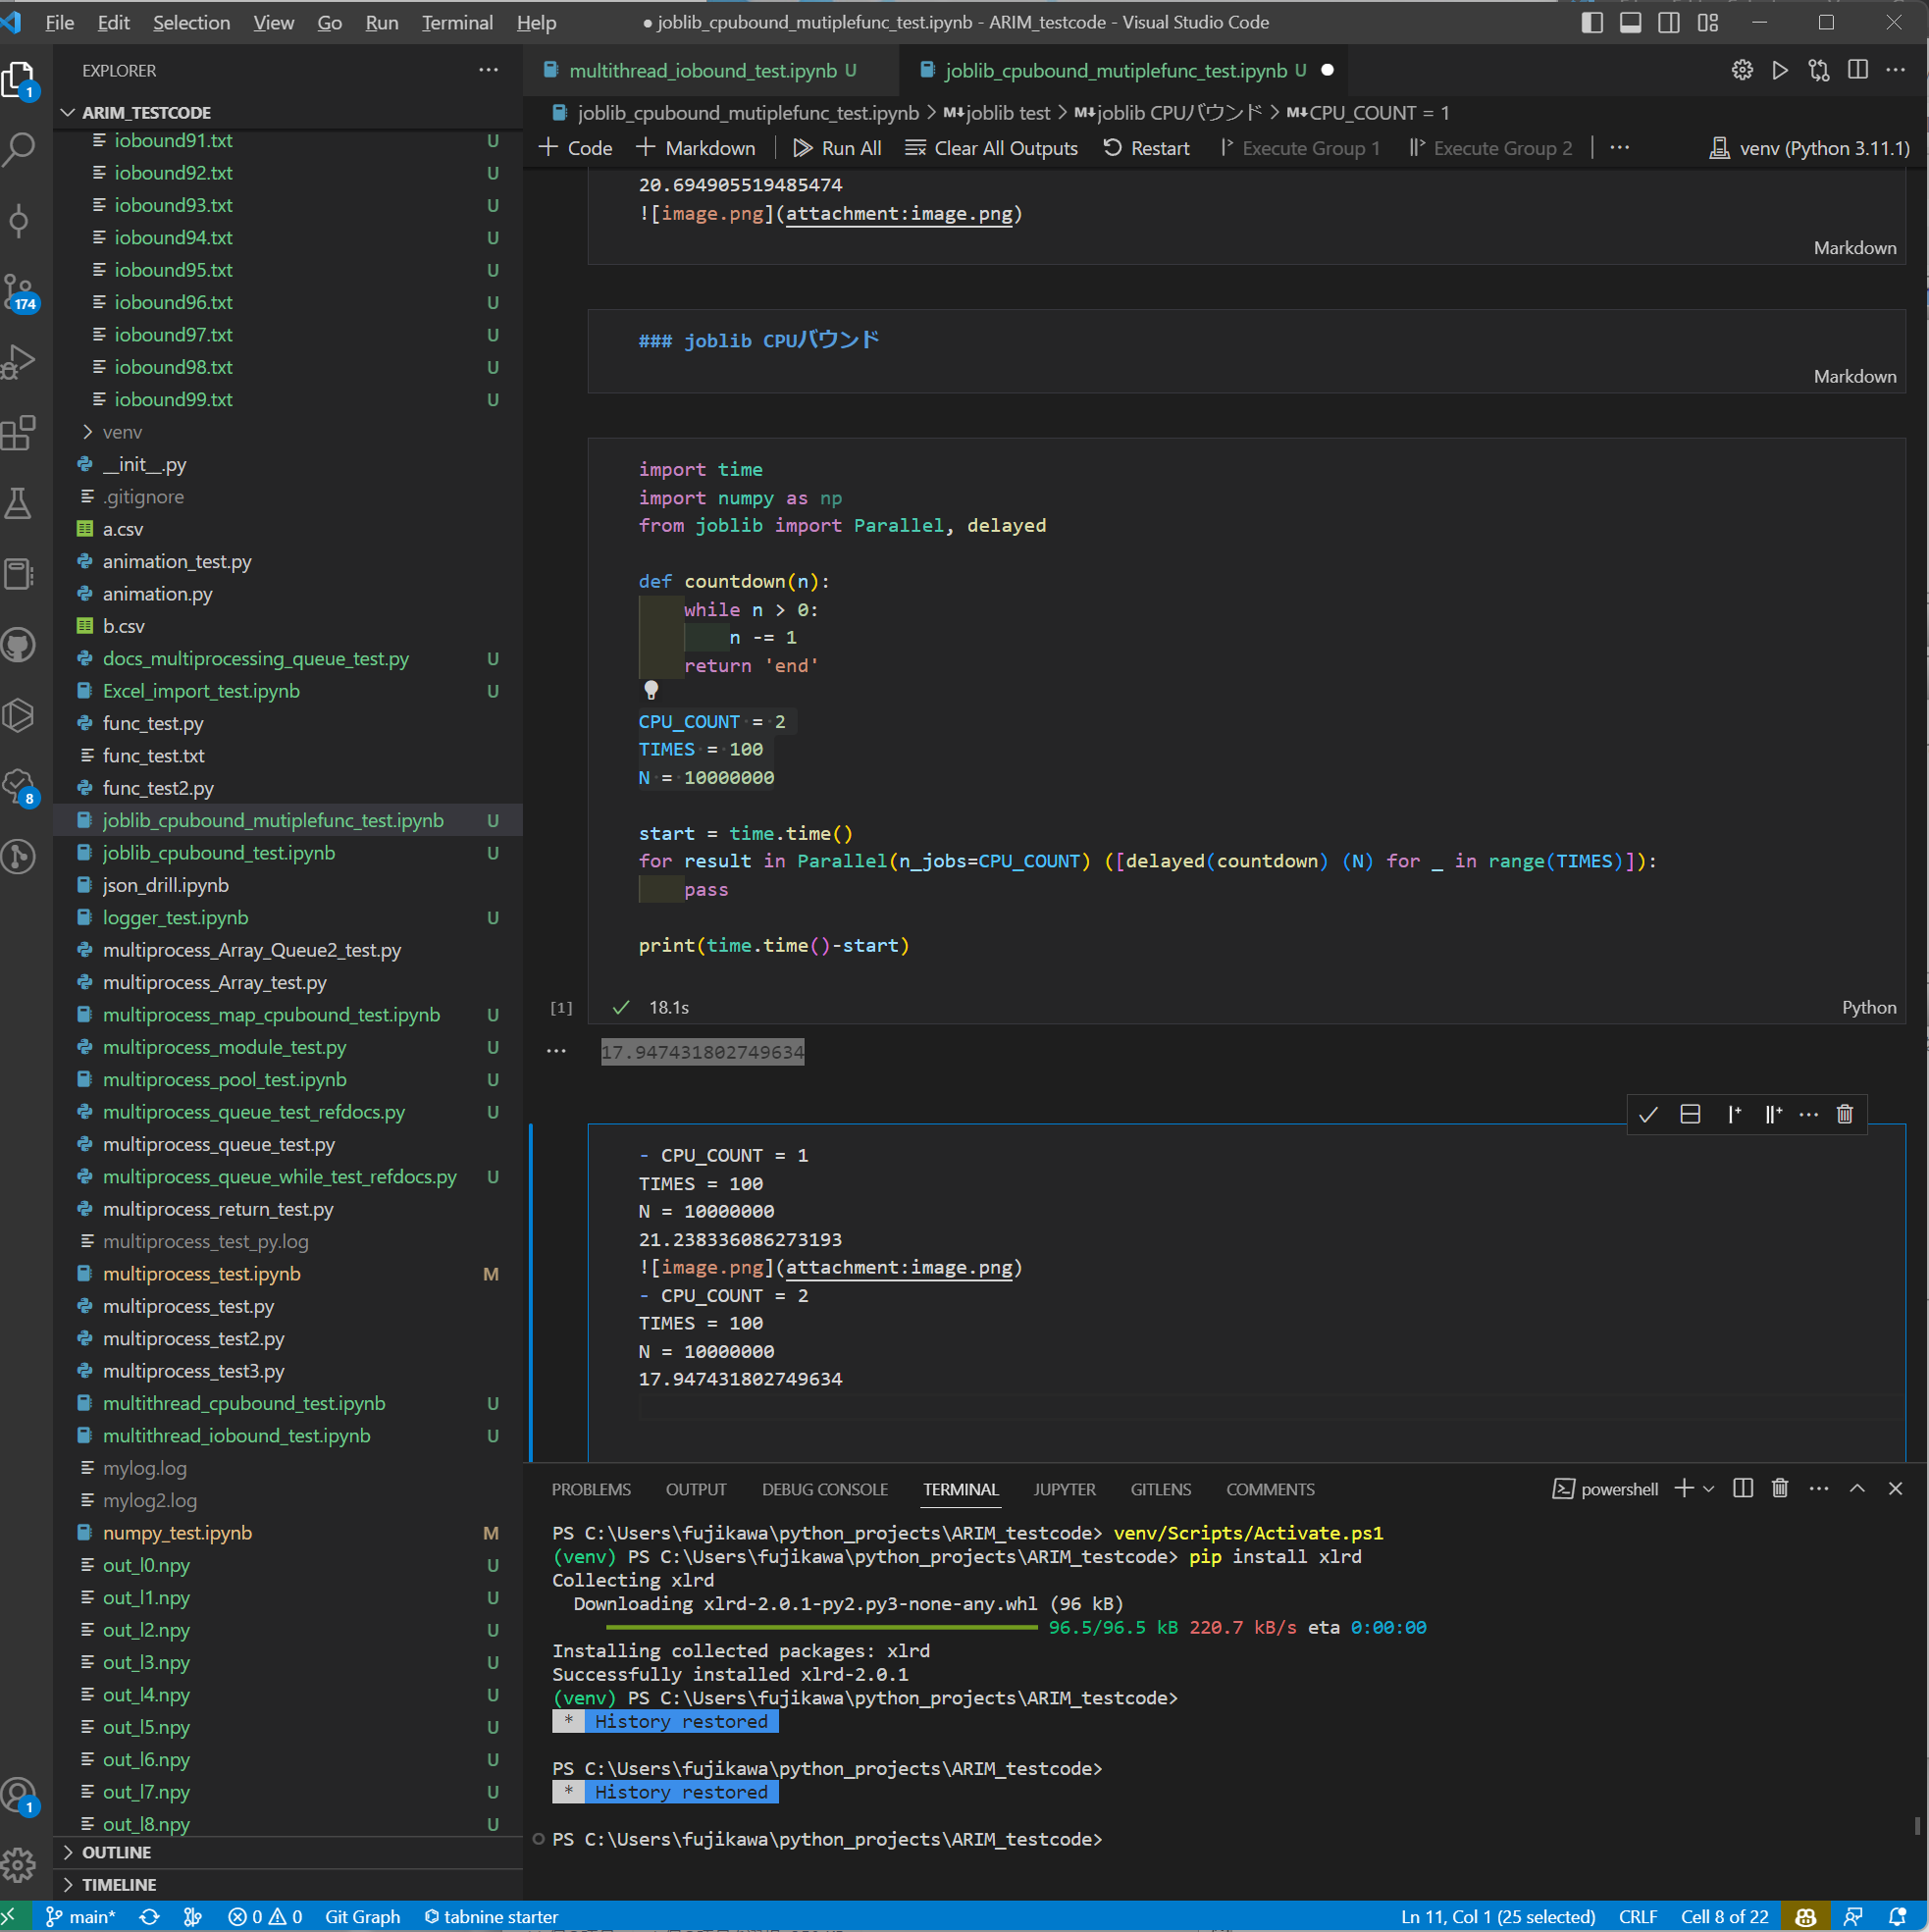
- CPU_COUNT = 4
TIMES = 100
N = 10000000
12.333479166030884

- CPU_COUNT = 6
TIMES = 100
N = 10000000
10.39752721786499
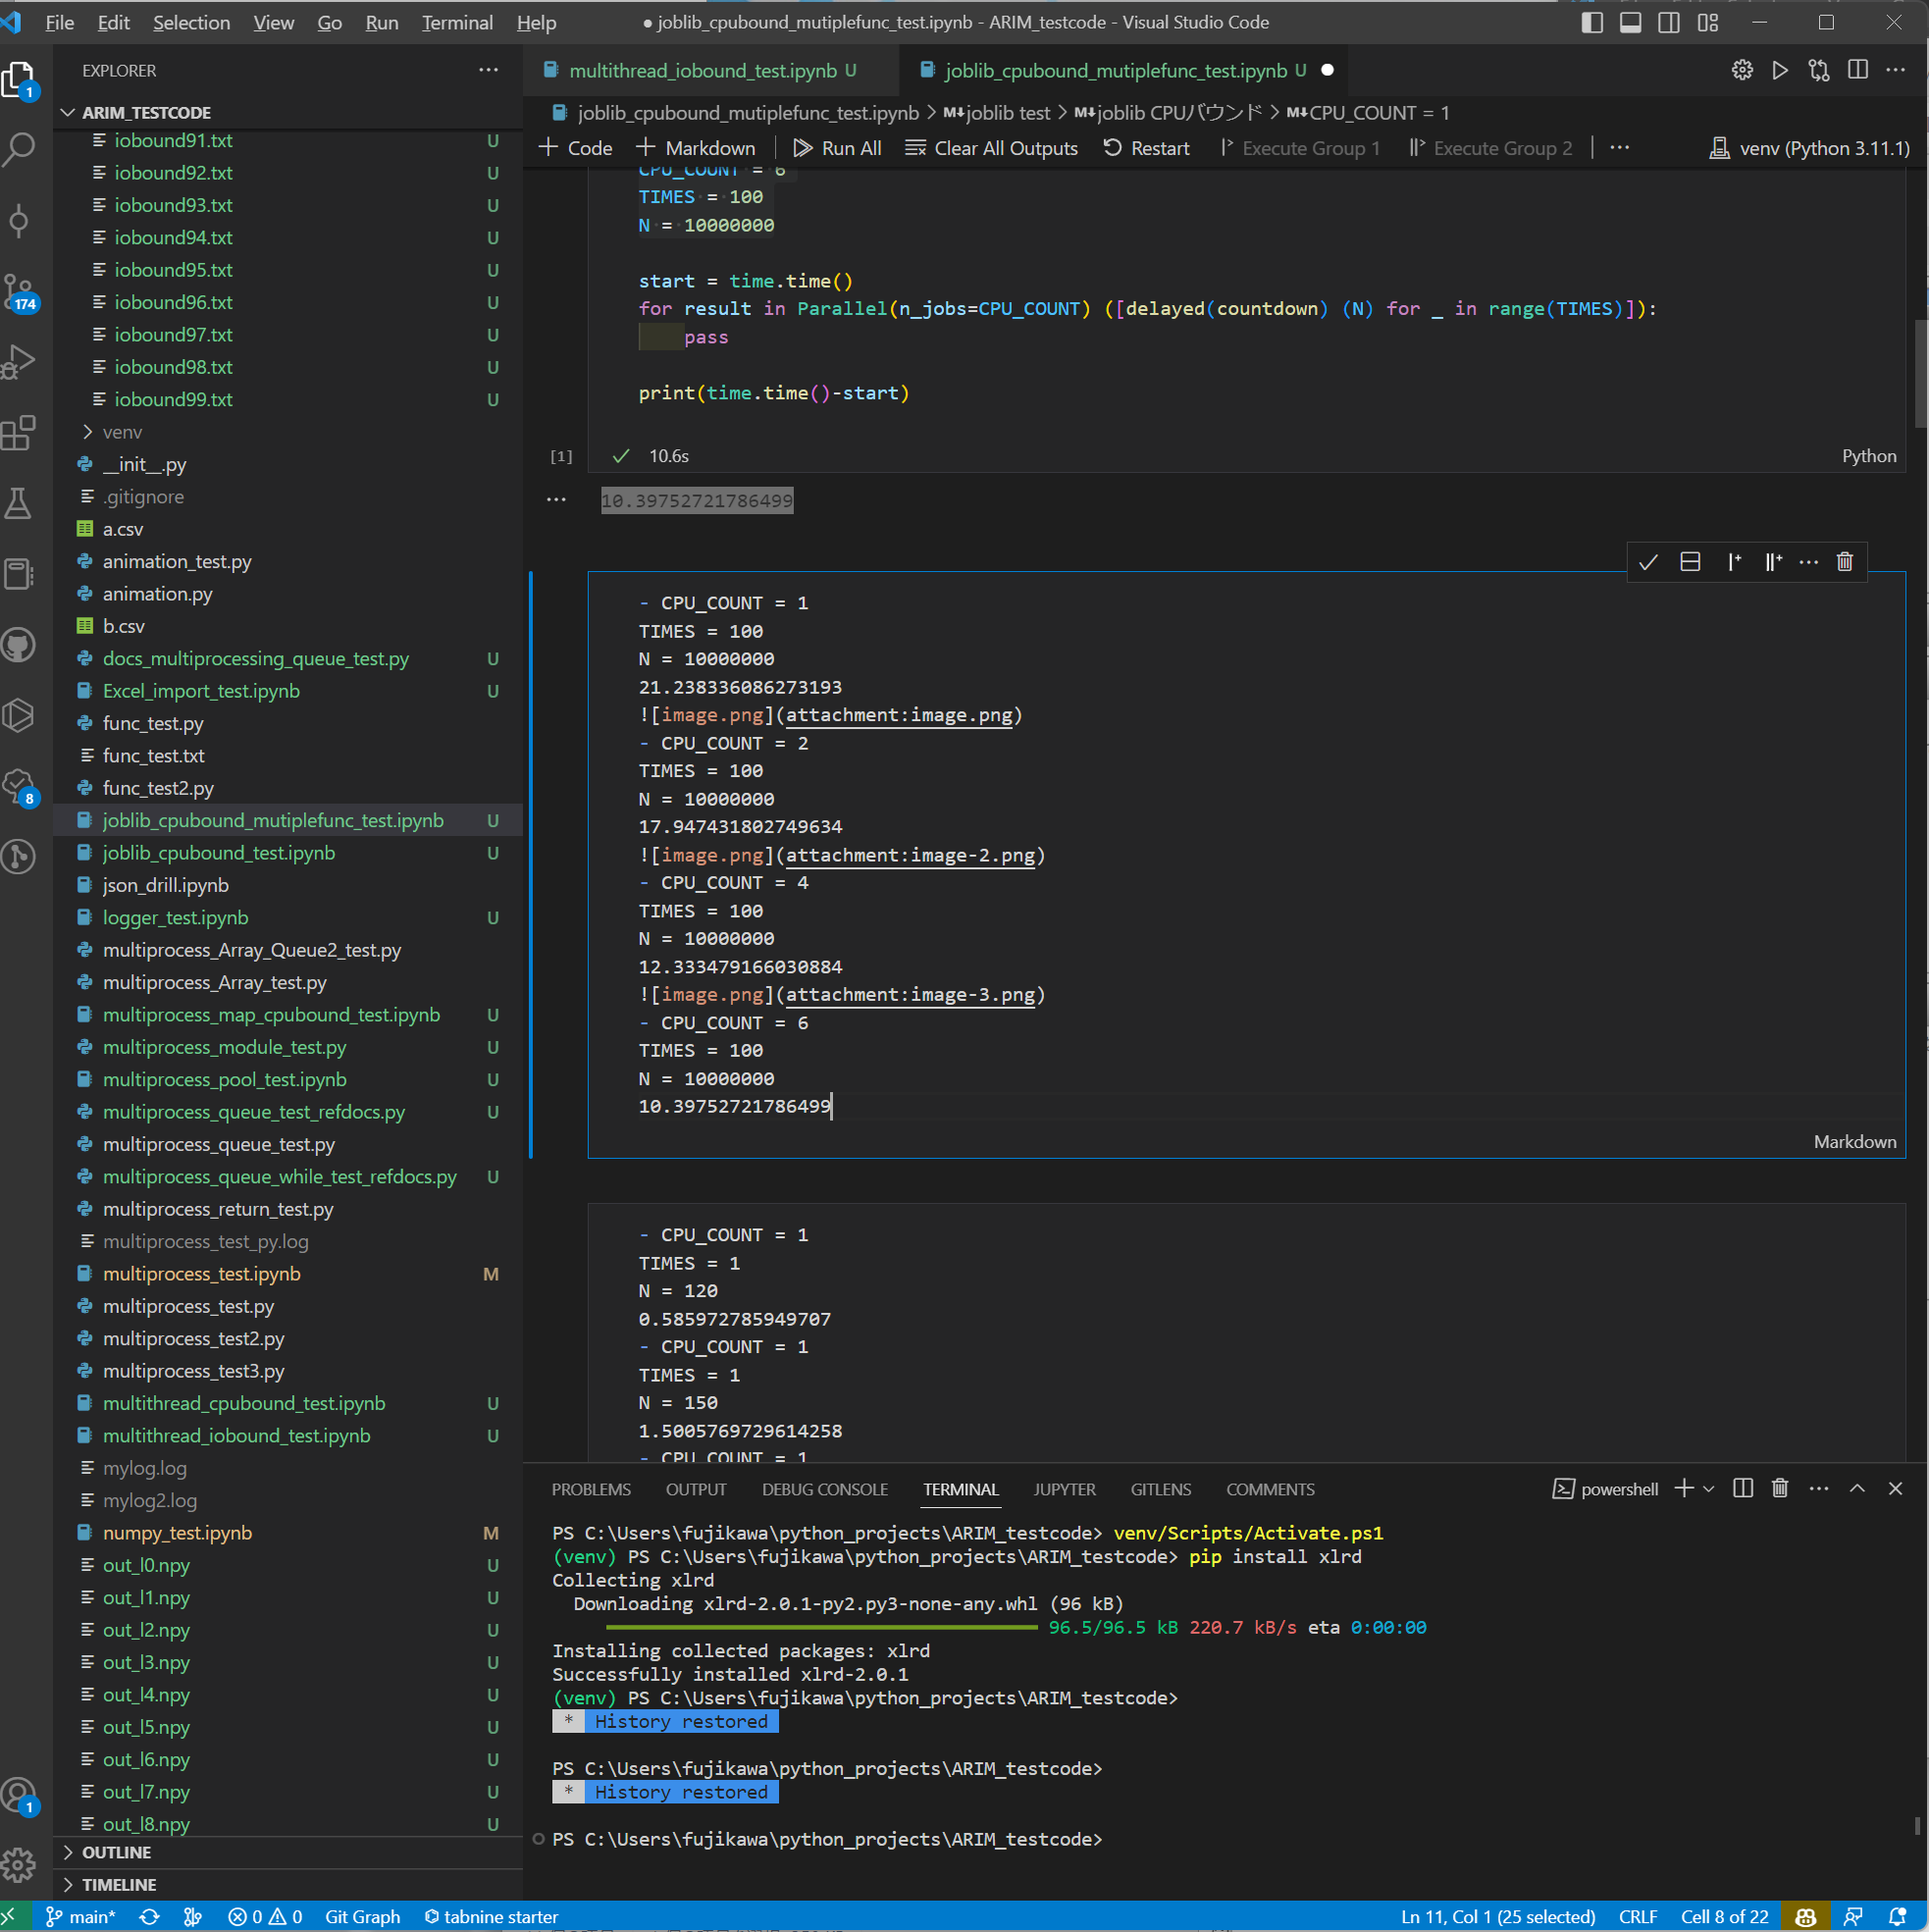
- CPU_COUNT = 1
TIMES = 50
N = 50000000
53.72765350341797
- CPU_COUNT = 2
TIMES = 50
N = 50000000
42.078813791275024
- CPU_COUNT = 4
TIMES = 50
N = 50000000
31.45463466644287
- CPU_COUNT = 6
TIMES = 50
N = 50000000
25.123106479644775
- CPU_COUNT = 8
TIMES = 50
N = 50000000
23.99584722518921


In [ ]:
import time
import numpy as np
from multiprocessing import Pool
from process_countdown import countdown

CPU_COUNT = 8
TIMES = 50
N = 50000000

p = Pool(processes=CPU_COUNT)
job_args = [N for _ in range(TIMES)]
start = time.time()
for result in p.imap_unordered(countdown, job_args):
    pass

print(time.time()-start)


- CPU_COUNT = 1
TIMES = 100
N = 10000000
20.368828296661377
- CPU_COUNT = 2
TIMES = 100
N = 10000000
11.31740117073059
- CPU_COUNT = 4
TIMES = 100
N = 10000000
8.284353017807007
- CPU_COUNT = 6
TIMES = 100
N = 10000000
7.419043779373169
- CPU_COUNT = 2
TIMES = 50
N = 50000000
31.629108428955078
- CPU_COUNT = 4
TIMES = 50
N = 50000000
25.72400164604187
- CPU_COUNT = 6
TIMES = 50
N = 50000000
22.276765823364258
- CPU_COUNT = 8
TIMES = 50
N = 50000000
22.6399245262146



### 引数をひとまとまりごとに

In [ ]:
import time
import numpy as np
from multiprocessing import Pool
from process_countdown_block import countdown

CPU_COUNT = 1
TIMES = 50
N = 50000000

p = Pool(processes=CPU_COUNT)

job_args = np.array_split([N for _ in range(TIMES)], CPU_COUNT)
# print(job_args)

start = time.time()
for result in p.imap_unordered(countdown, job_args):
    print(result)

print(time.time()-start)


- CPU_COUNT = 2
TIMES = 100
N = 10000000
32.6564724445343
- CPU_COUNT = 4
TIMES = 100
N = 10000000
22.42571210861206
- CPU_COUNT = 6
TIMES = 100
N = 10000000
18.038896799087524
- CPU_COUNT = 8
TIMES = 100
N = 10000000
16.395970344543457
- CPU_COUNT = 1
TIMES = 50
N = 50000000
- CPU_COUNT = 2
TIMES = 50
N = 50000000
84.1349675655365
- CPU_COUNT = 4
TIMES = 50
N = 50000000
56.50971055030823

In [ ]:
from joblib import Parallel, delayed
import time
import numpy as np

def wrap_calc(args):
    # print(args)
    return calc(*args)

def calc(A, n):

    a = np.random.random((n, n))

    b = np.random.random((n, n))
    c = np.dot(a, b).reshape([n*n])

    g = [gauss(i, a=A, mu=n*n/2, sigma=n*n/8) for i in range(n*n)]

    # ガウシアンとのコンボリューション
    conv =  np.convolve(c, g, mode='same')
    
    # x軸の定義
    x =  np.array([i for i in range(n*n)])

    #4次関数でのフィッティング
    f1, f2, f3, f4, f5 = np.fit(x, conv, 4)
    return f1, f2, f3, f4, f5
    # fit = [func(i, f1, f2, f3, f4, f5) for i in x]

def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

CPU_COUNT = 6
TIMES = 500
N = 150

job_args = [(i, N) for i in range(TIMES)]

start = time.time()

for result in Parallel(n_jobs=CPU_COUNT) ([delayed(wrap_calc) (args) for args in job_args]):
    pass
    # print(result)

print(time.time()-start)


- CPU_COUNT = 1
TIMES = 100
N = 120
56.57072305679321
- CPU_COUNT = 2
TIMES = 100
N = 120
16.48804497718811
- CPU_COUNT = 4
TIMES = 100
N = 120
5.196465015411377
- CPU_COUNT = 6
TIMES = 100
N = 120
3.4273998737335205
- CPU_COUNT = 8
TIMES = 100
N = 120
1.829620599746704
- CPU_COUNT = 10
TIMES = 100
N = 120
2.0630264282226562
- CPU_COUNT = 12
TIMES = 100
N = 120
2.358685255050659
- CPU_COUNT = 6
TIMES = 100
N = 150
7.114055156707764
- CPU_COUNT = 8
TIMES = 100
N = 150
2.6081085205078125
- CPU_COUNT = 2
TIMES = 24
N = 200
16.646991968154907
- CPU_COUNT = 4
TIMES = 24
N = 200
5.842790842056274
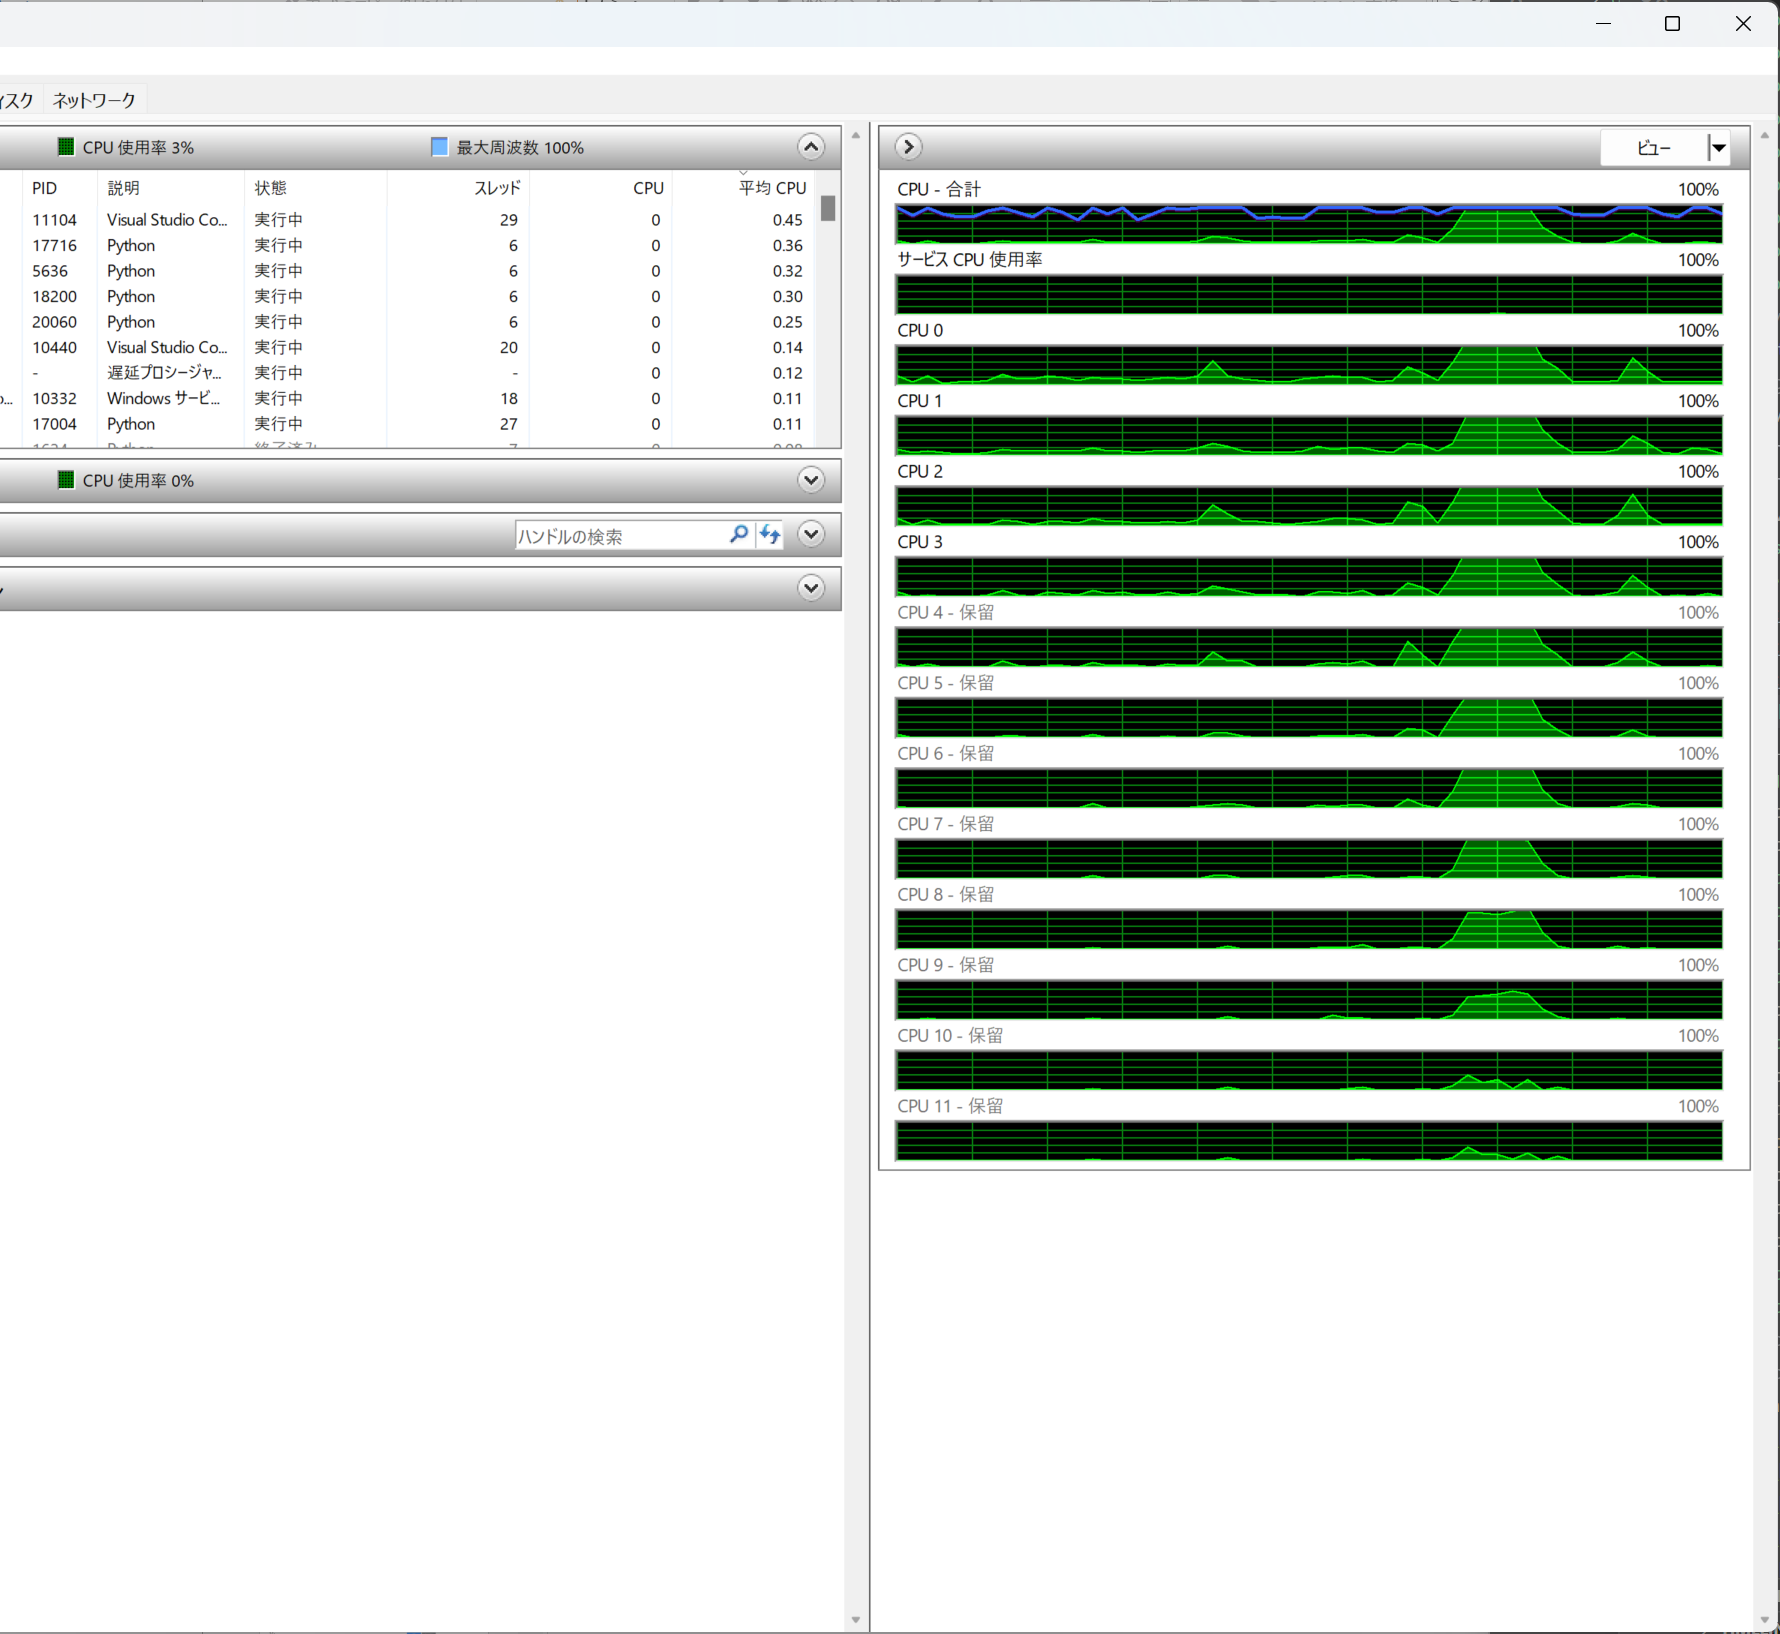
- CPU_COUNT = 4
TIMES = 25
N = 200
6.3791663646698
- CPU_COUNT = 5
TIMES = 24
N = 200
4.568622350692749
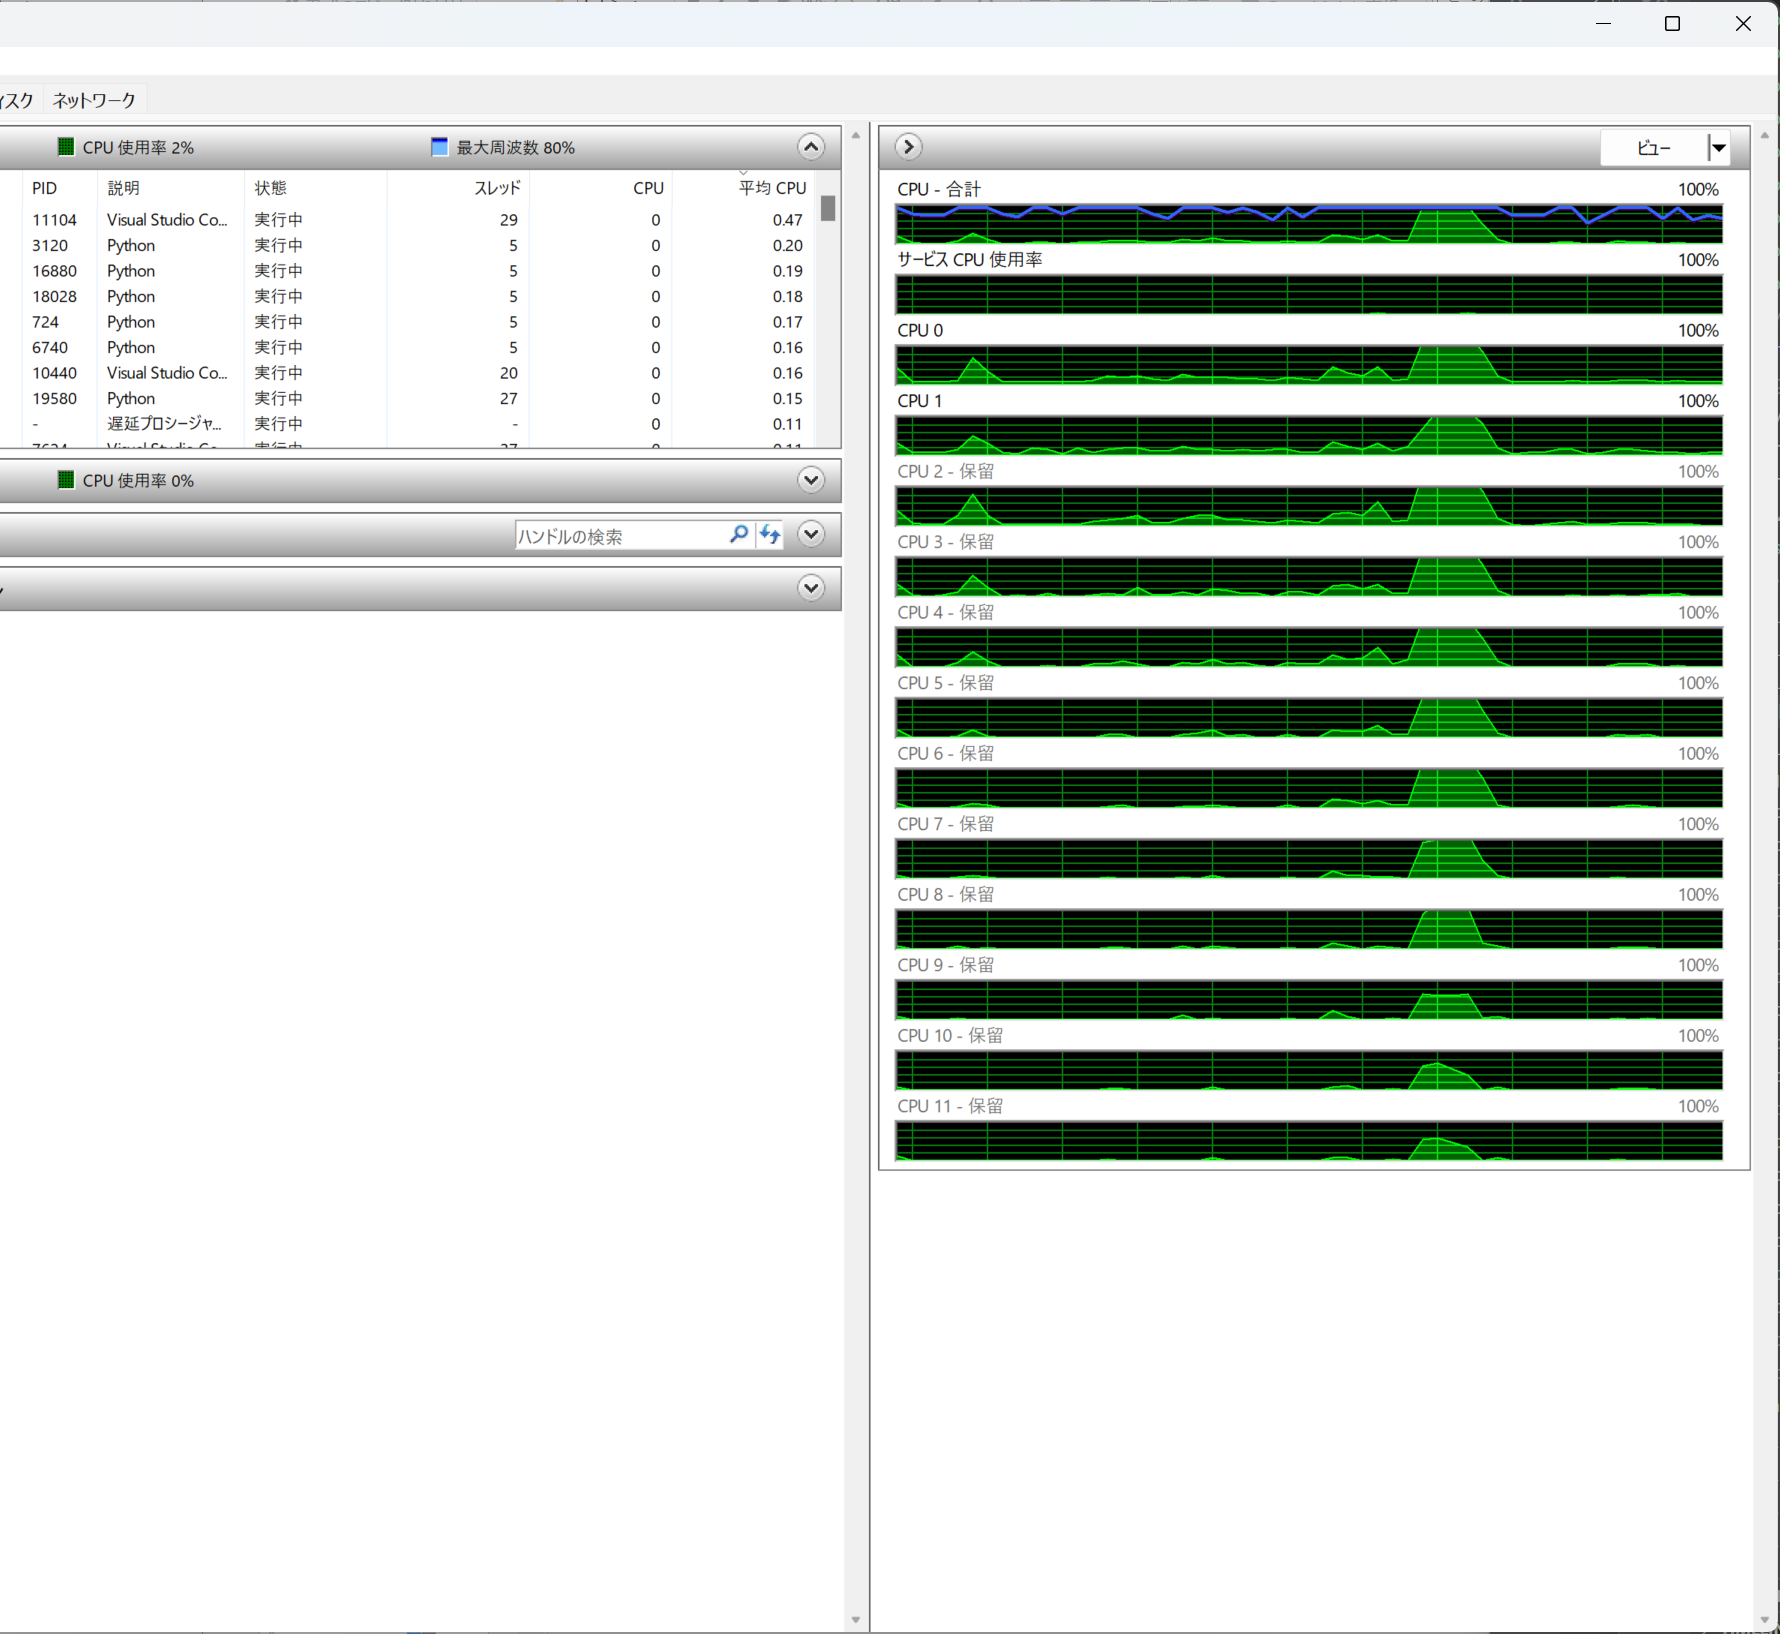
- CPU_COUNT = 6
TIMES = 24
N = 200
4.0602357387542725
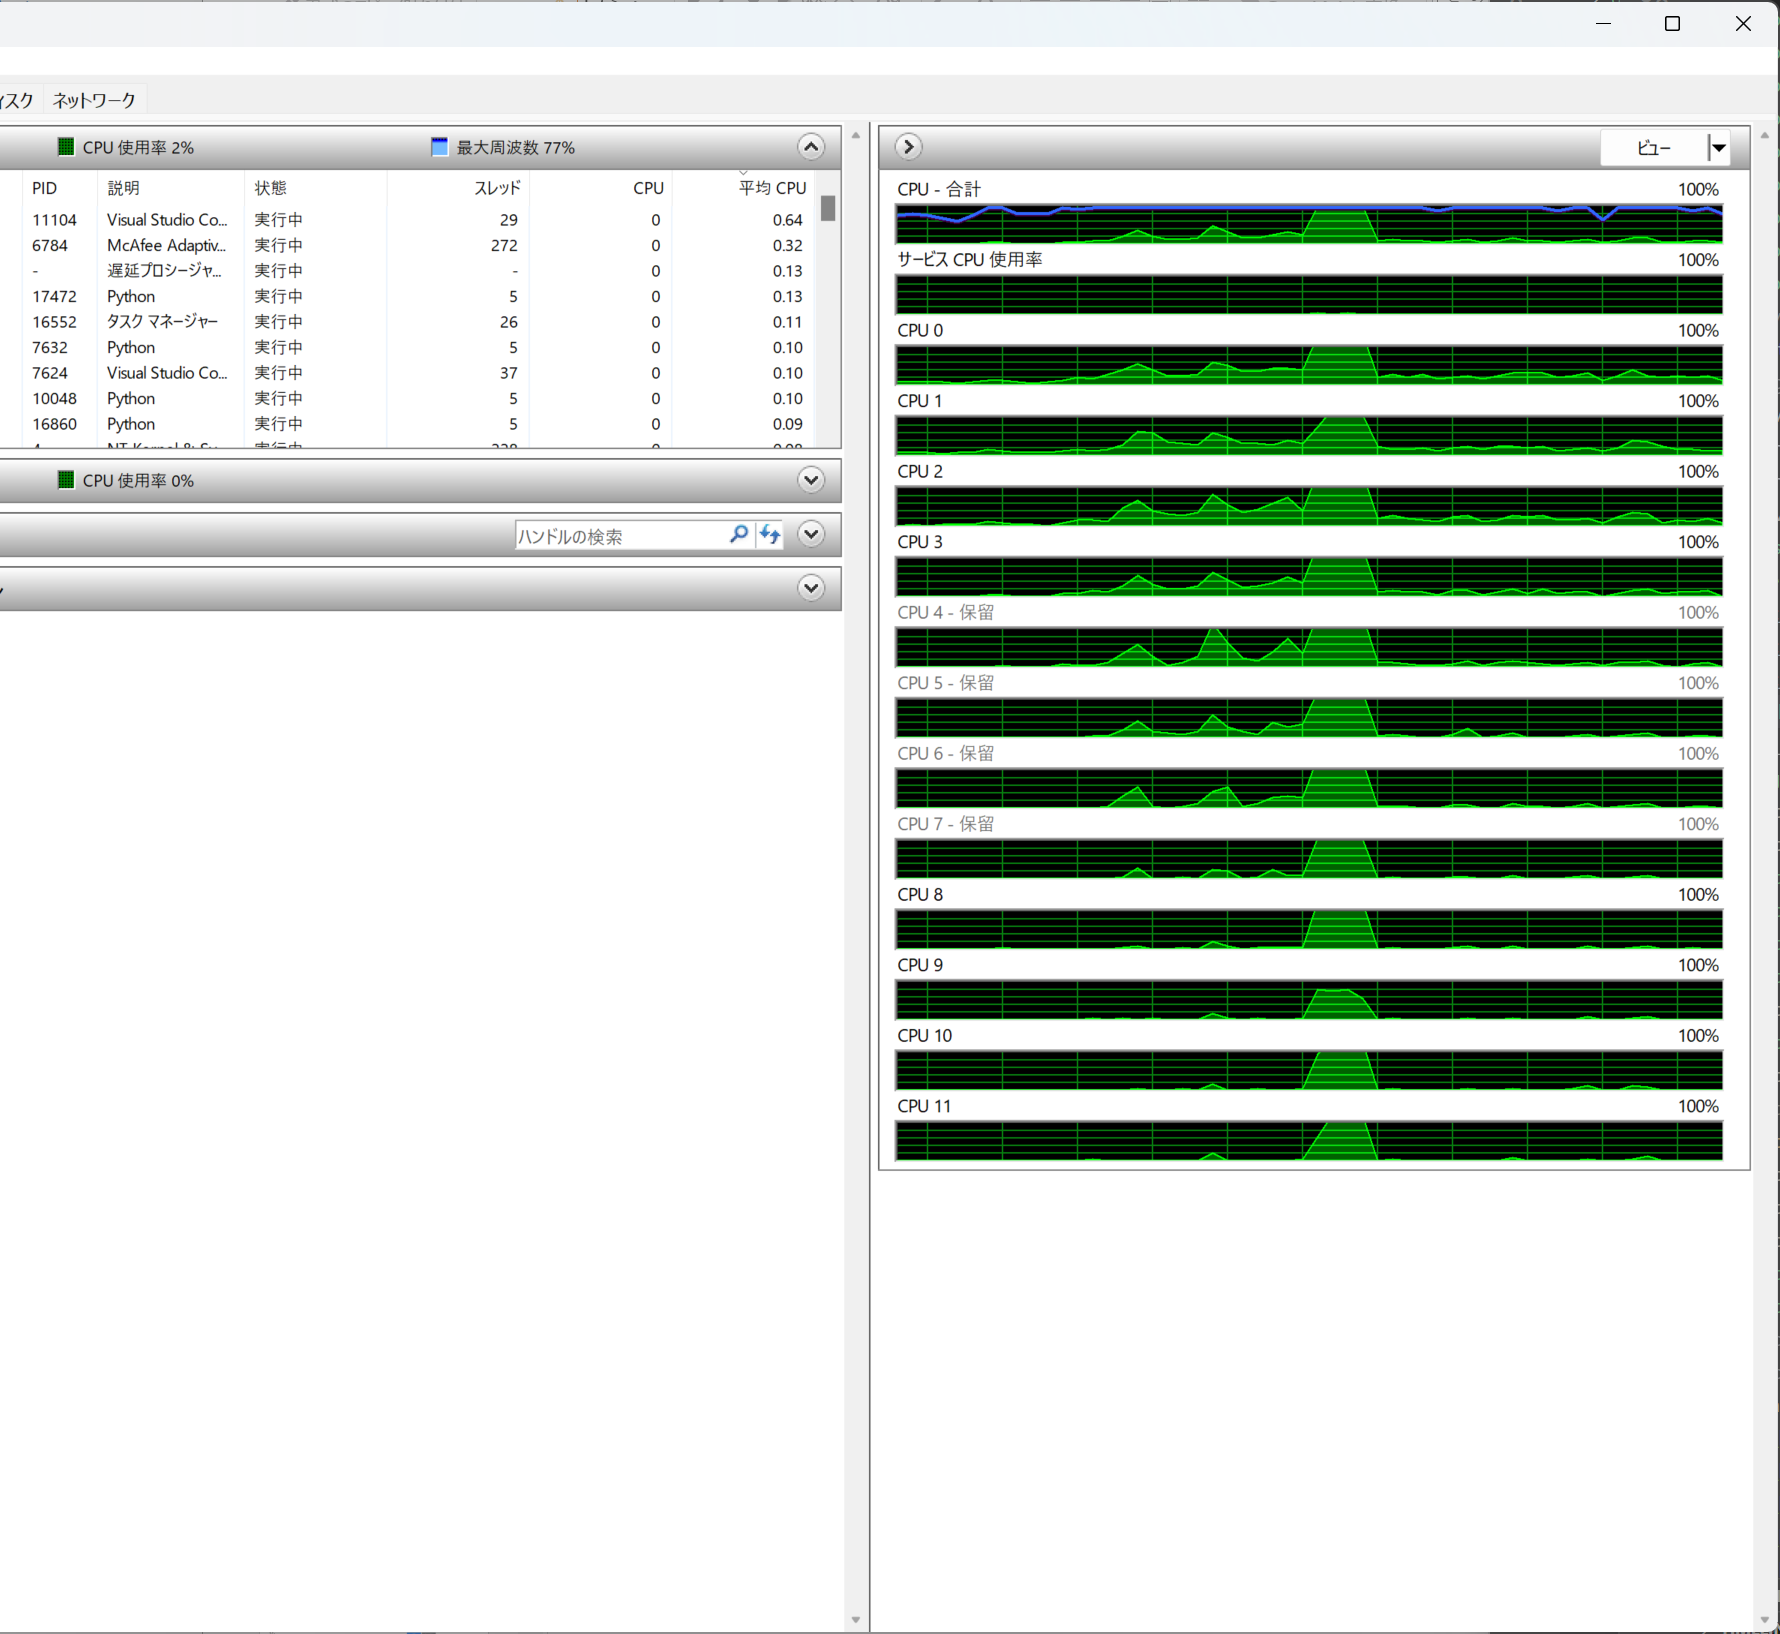
- CPU_COUNT = 6
TIMES = 25
N = 200
4.516061782836914
- CPU_COUNT = 7
TIMES = 24
N = 200
2.1445112228393555
- CPU_COUNT = 8
TIMES = 24
N = 200
2.207643508911133
- CPU_COUNT = 10
TIMES = 24
N = 200
2.3841946125030518
- CPU_COUNT = 12
TIMES = 24
N = 200
2.6013553142547607
- CPU_COUNT = 4
TIMES = 216
N = 200
46.22023248672485
- CPU_COUNT = 5
TIMES = 216
N = 200
33.92997908592224
- CPU_COUNT = 6
TIMES = 216
N = 200
29.20413327217102
- CPU_COUNT = 7
TIMES = 216
N = 200
- CPU_COUNT = 6
TIMES = 1000
N = 120
25.551272869110107
- CPU_COUNT = 6
TIMES = 500
N = 150
30.970653772354126

### プロセスのコアを増やす
- CPU_COUNT = 1
TIMES = 1
N = 450
14.117026805877686
- CPU_COUNT = 2
TIMES = 1
N = 450
8.790517568588257
- CPU_COUNT = 4
TIMES = 1
N = 450
7.048987627029419
- CPU_COUNT = 1
TIMES = 1
N = 500
18.069915771484375
- CPU_COUNT = 2
TIMES = 1
N = 500
11.19430923461914
- CPU_COUNT = 3
TIMES = 1
N = 500
9.89956259727478
- CPU_COUNT = 4
TIMES = 1
N = 500
8.694450855255127
- CPU_COUNT = 6
TIMES = 1
N = 500
9.29934024810791
- 早くなる

### プロセスに渡す引数をコアごとにひとまとまりで

In [ ]:
from joblib import Parallel, delayed
import time
# set the number of threads for many common libraries
# from os import environ
# N_THREADS = '1'
# environ['OMP_NUM_THREADS'] = N_THREADS
# environ['OPENBLAS_NUM_THREADS'] = N_THREADS
# environ['MKL_NUM_THREADS'] = N_THREADS
# environ['VECLIB_MAXIMUM_THREADS'] = N_THREADS
# environ['NUMEXPR_NUM_THREADS'] = N_THREADS
import numpy as np


CPU_COUNT = 6
TIMES = 100
N = 200
results = []
def wrap_calc(args):
    return calc(*args)

def calc(As, n):

    results = []
    for A in As:
        a = np.random.random((n, n))
        b = np.random.random((n, n))
        c = np.dot(a, b).reshape([n*n])

        g = [gauss(i, a=A, mu=n*n/2, sigma=n*n/8) for i in range(n*n)]
        # ガウシアンとのコンボリューション
        conv =  np.convolve(c, g, mode='same')
        # x軸の定義
        x =  np.array([i for i in range(n*n)])

        #4次関数でのフィッティング
        f1, f2, f3, f4, f5 = np.fit(x, conv, 4)
        results.append([f1, f2, f3, f4, f5])
    return results
    # fit = [func(i, f1, f2, f3, f4, f5) for i in x]

def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

As_list = np.array_split([i for i in range(TIMES)], CPU_COUNT)
job_args = [(As, N) for As in As_list]
start = time.time()

for result in Parallel(n_jobs=CPU_COUNT) ([delayed(wrap_calc) (args) for args in job_args]):
    results.append(result)

print(time.time()-start)
print(results)


- CPU_COUNT = 1
TIMES = 100
N = 120
57.02318453788757
- CPU_COUNT = 2
TIMES = 100
N = 120
16.495840549468994
- CPU_COUNT = 4
TIMES = 100
N = 120
5.342941045761108
- CPU_COUNT = 6
TIMES = 100
N = 120
3.455343246459961
- CPU_COUNT = 8
TIMES = 100
N = 120
1.8238143920898438
- CPU_COUNT = 10
TIMES = 100
N = 120
2.2694835662841797
- CPU_COUNT = 12
TIMES = 100
N = 120
2.543931245803833
- CPU_COUNT = 6
TIMES = 100
N = 150
7.218682289123535
- CPU_COUNT = 8
TIMES = 100
N = 150
2.704538345336914
- CPU_COUNT = 10
TIMES = 100
N = 150
2.960899591445923
- CPU_COUNT = 2
TIMES = 24
N = 200
17.42654275894165
- CPU_COUNT = 4
TIMES = 24
N = 200
5.8233983516693115
-CPU_COUNT = 4
TIMES = 25
N = 200
6.479995965957642
- CPU_COUNT = 5
TIMES = 24
N = 200
4.51461935043335
- CPU_COUNT = 6
TIMES = 24
N = 200
4.121129035949707
- CPU_COUNT = 6
TIMES = 25
N = 200
4.565927028656006
- CPU_COUNT = 8
TIMES = 24
N = 200
2.148132562637329
- CPU_COUNT = 10
TIMES = 24
N = 200
2.336297035217285
- CPU_COUNT = 12
TIMES = 24
N = 200
2.9048590660095215
- CPU_COUNT = 4
TIMES = 216
N = 200
46.031554222106934
- CPU_COUNT = 5
TIMES = 216
N = 200
34.17951488494873
- CPU_COUNT = 6
TIMES = 216
N = 200
29.025034427642822
- CPU_COUNT = 7
TIMES = 216
N = 200
10.274674892425537
- CPU_COUNT = 6
TIMES = 1000
N = 120
26.770368337631226
- CPU_COUNT = 6
TIMES = 500
N = 150
30.994555711746216


## prevent over subscription
### CPU_COUNT = 6
TIMES = 100
N = 150
- スレッド制限なし
    - 7.0548224449157715
    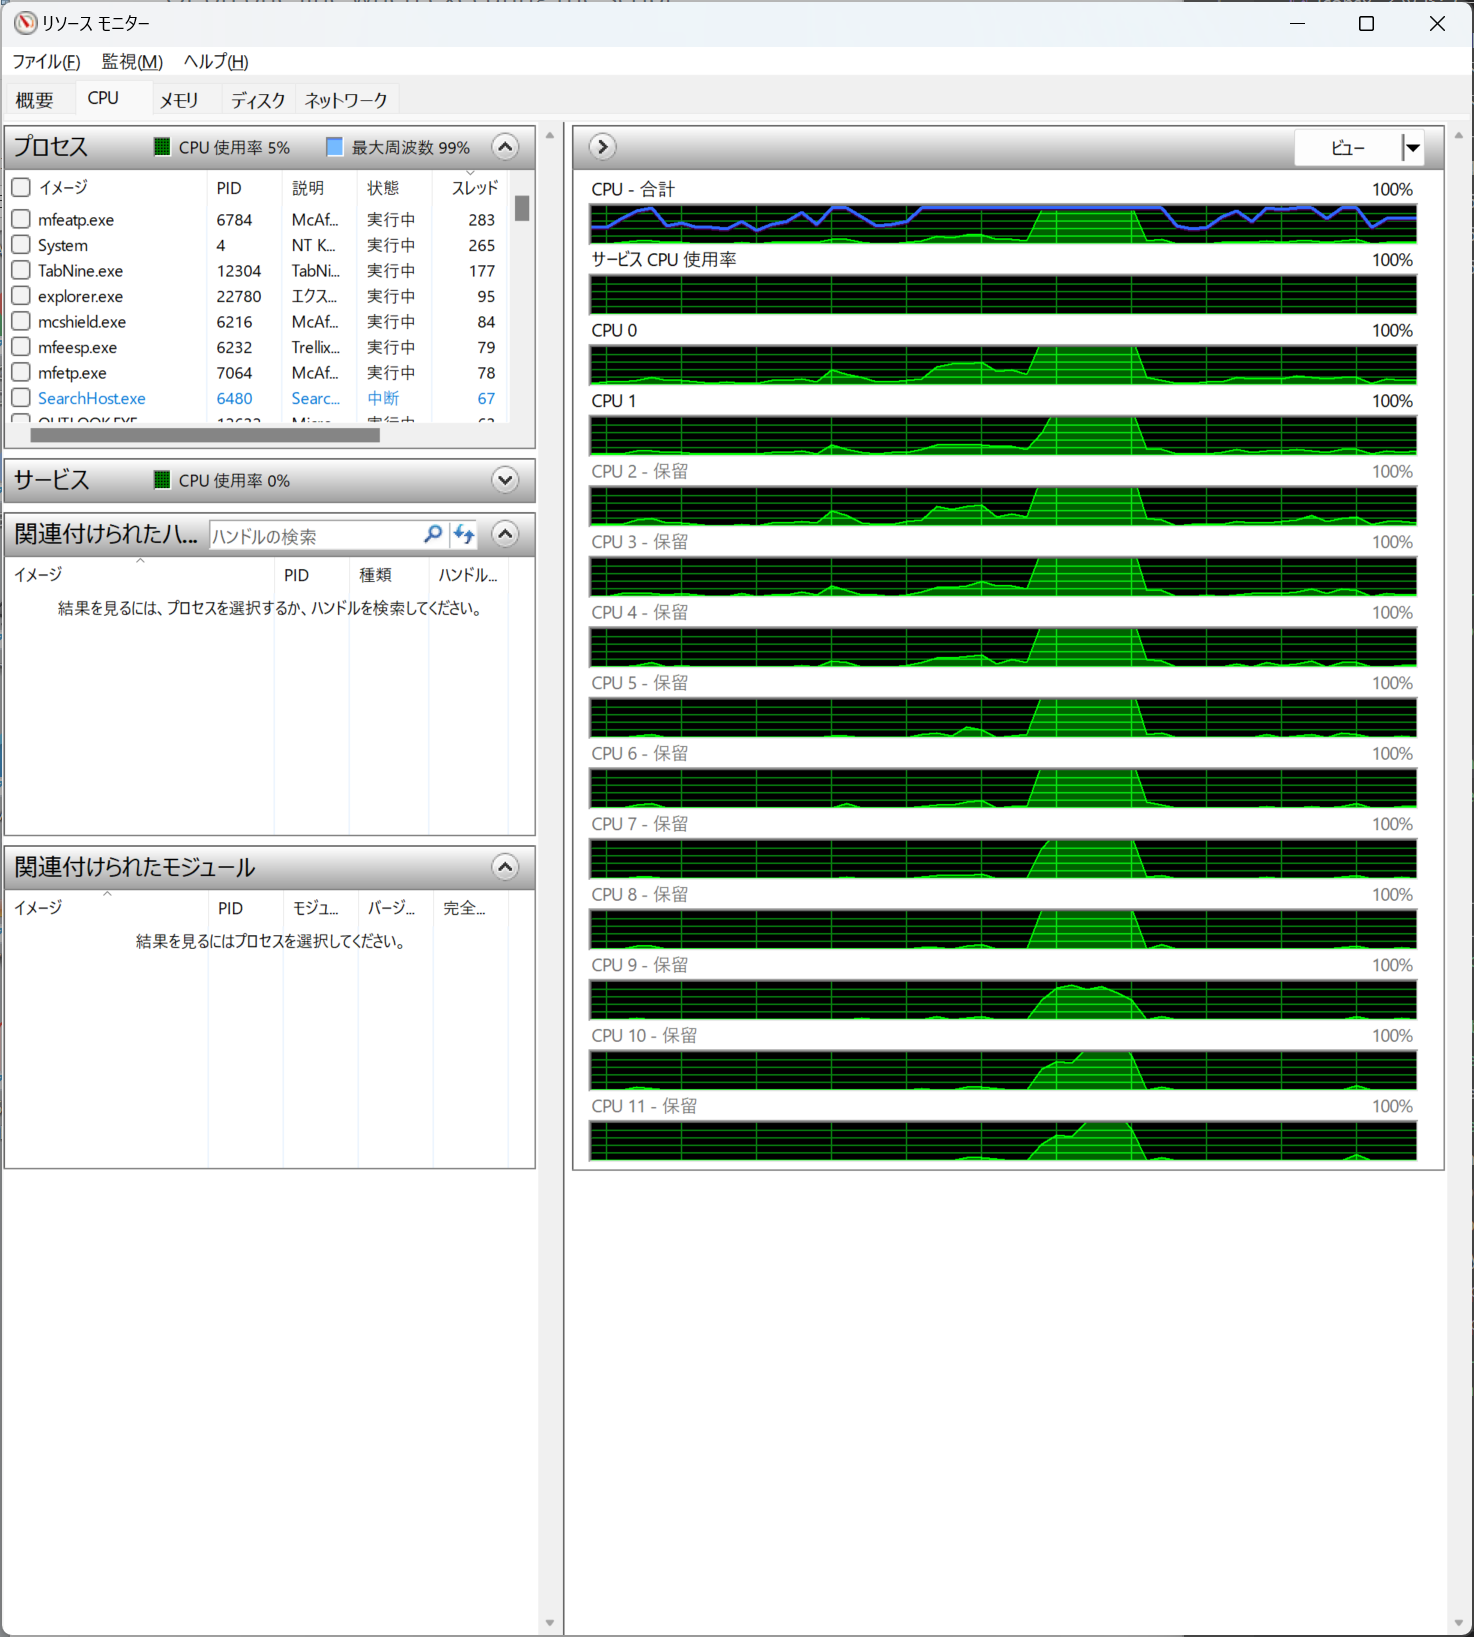
- スレッド制限あり　1スレッド
    - 2.9553723335266113
    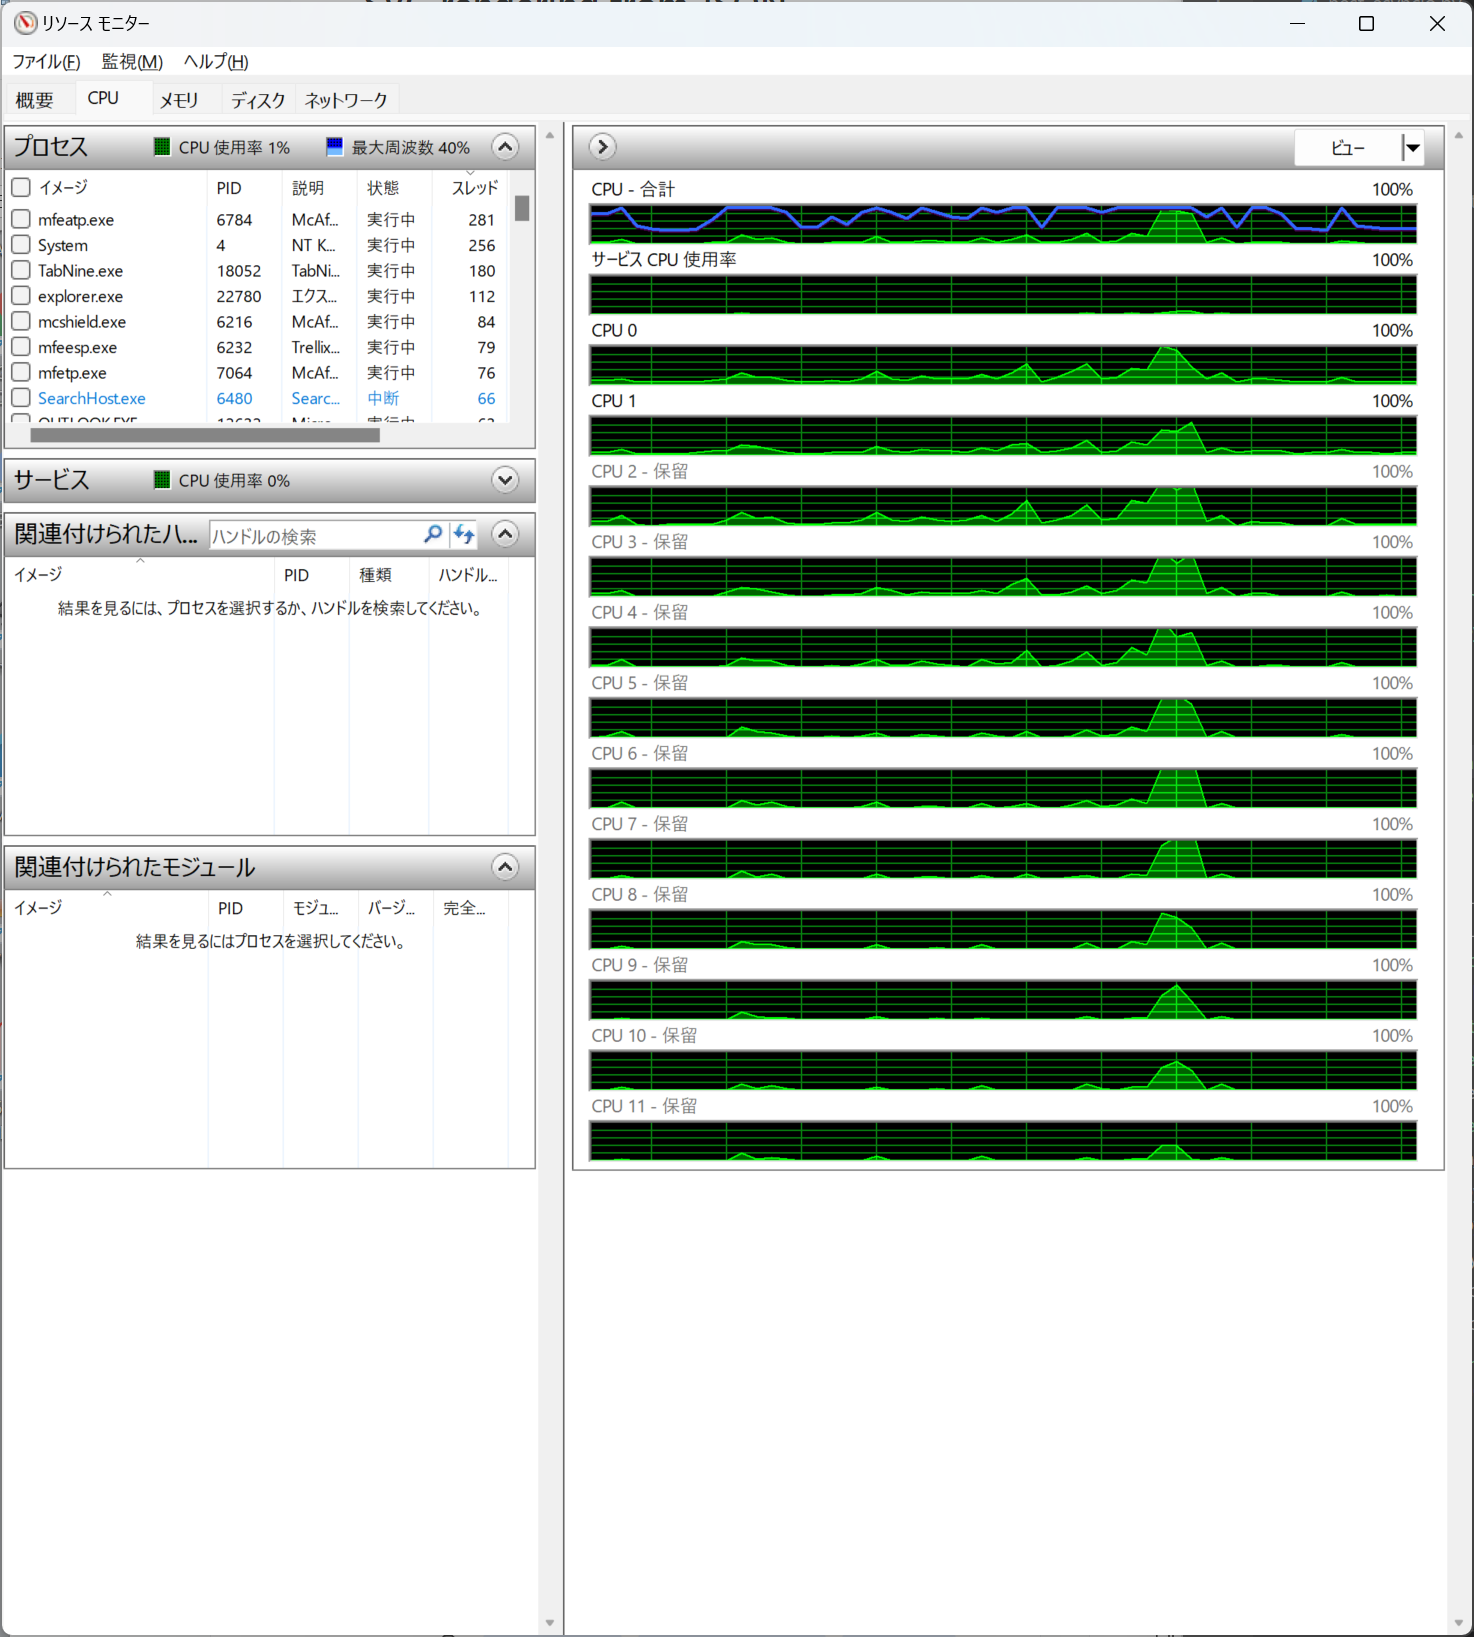
### CPU_COUNT = 6
TIMES = 300
N = 150
- スレッド制限なし
    - 19.230244398117065
- スレッド制限あり　1スレッド
    - 6.836821556091309
### CPU_COUNT = 6
TIMES = 500
N = 150
- スレッド制限なし
    - 31.98078680038452
- スレッド制限あり　1スレッド
    - 10.495868682861328
### CPU_COUNT = 6
TIMES = 100
N = 200    
- スレッド制限なし
    - 14.197551727294922
    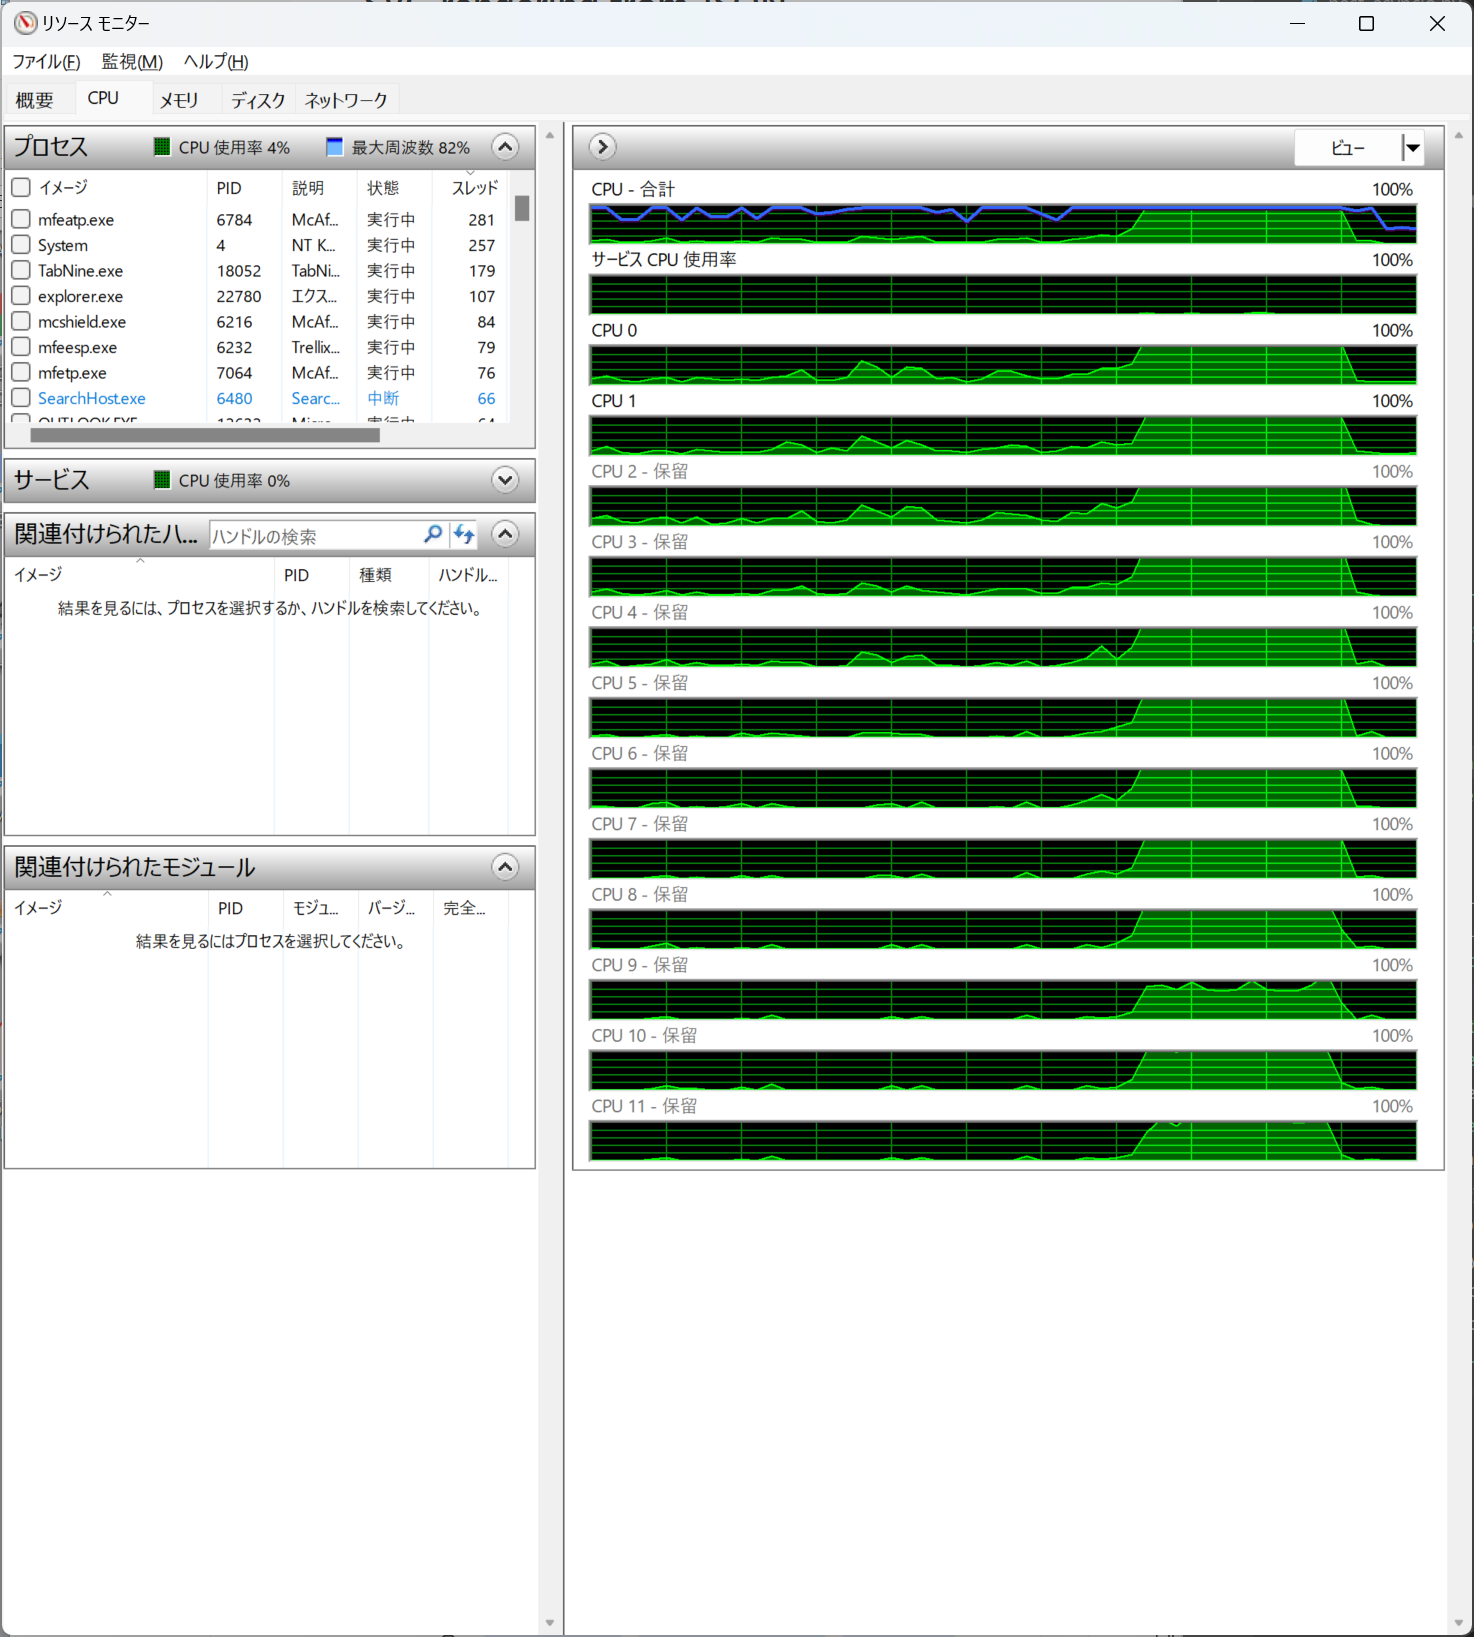
- スレッド制限あり　1スレッド
    - 6.827087163925171
    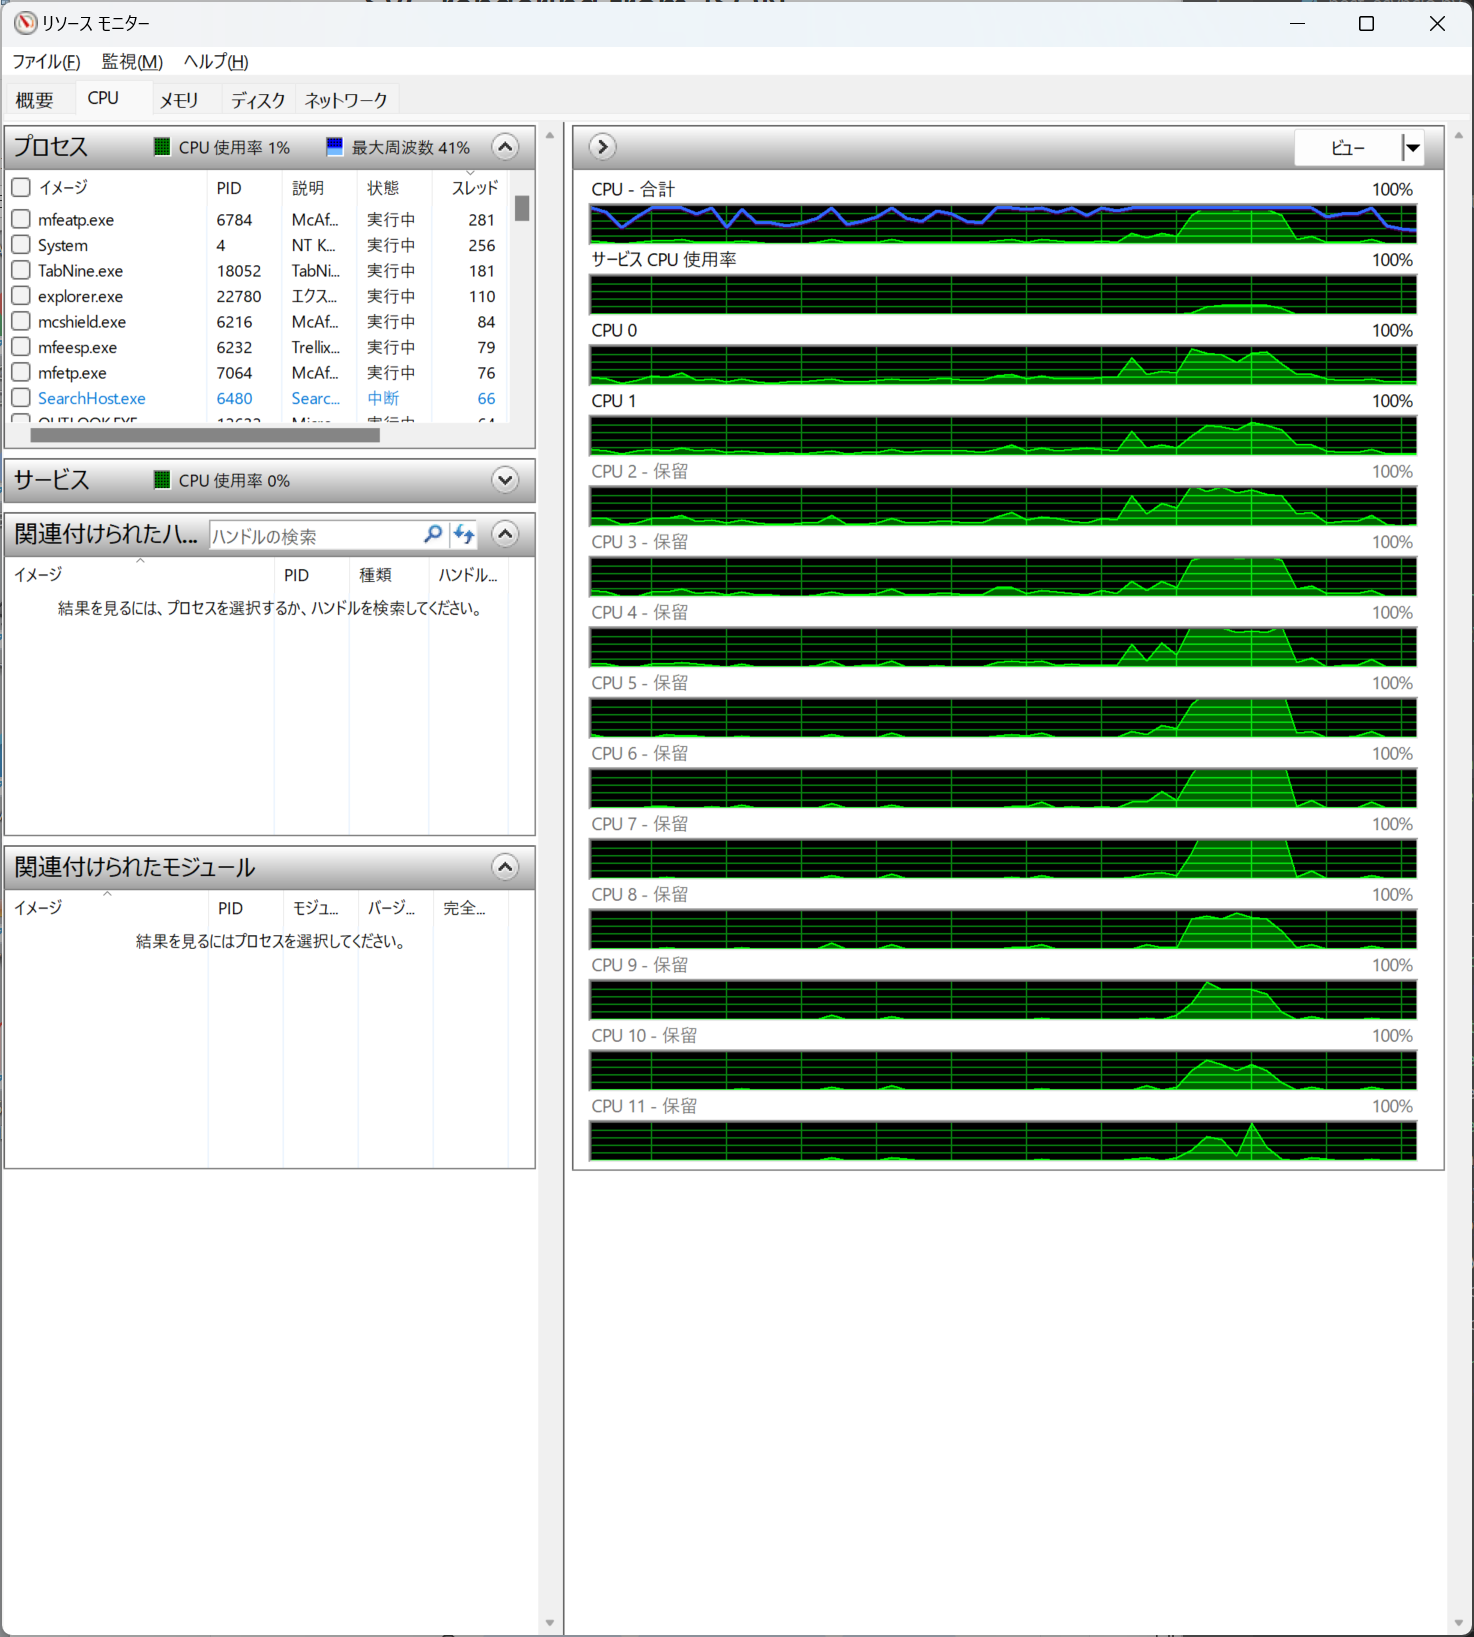
### CPU_COUNT = 6
TIMES = 100
N = 300
- スレッド制限なし
    - 46.24900579452515
    
- スレッド制限あり　1スレッド
    - 28.583861112594604
    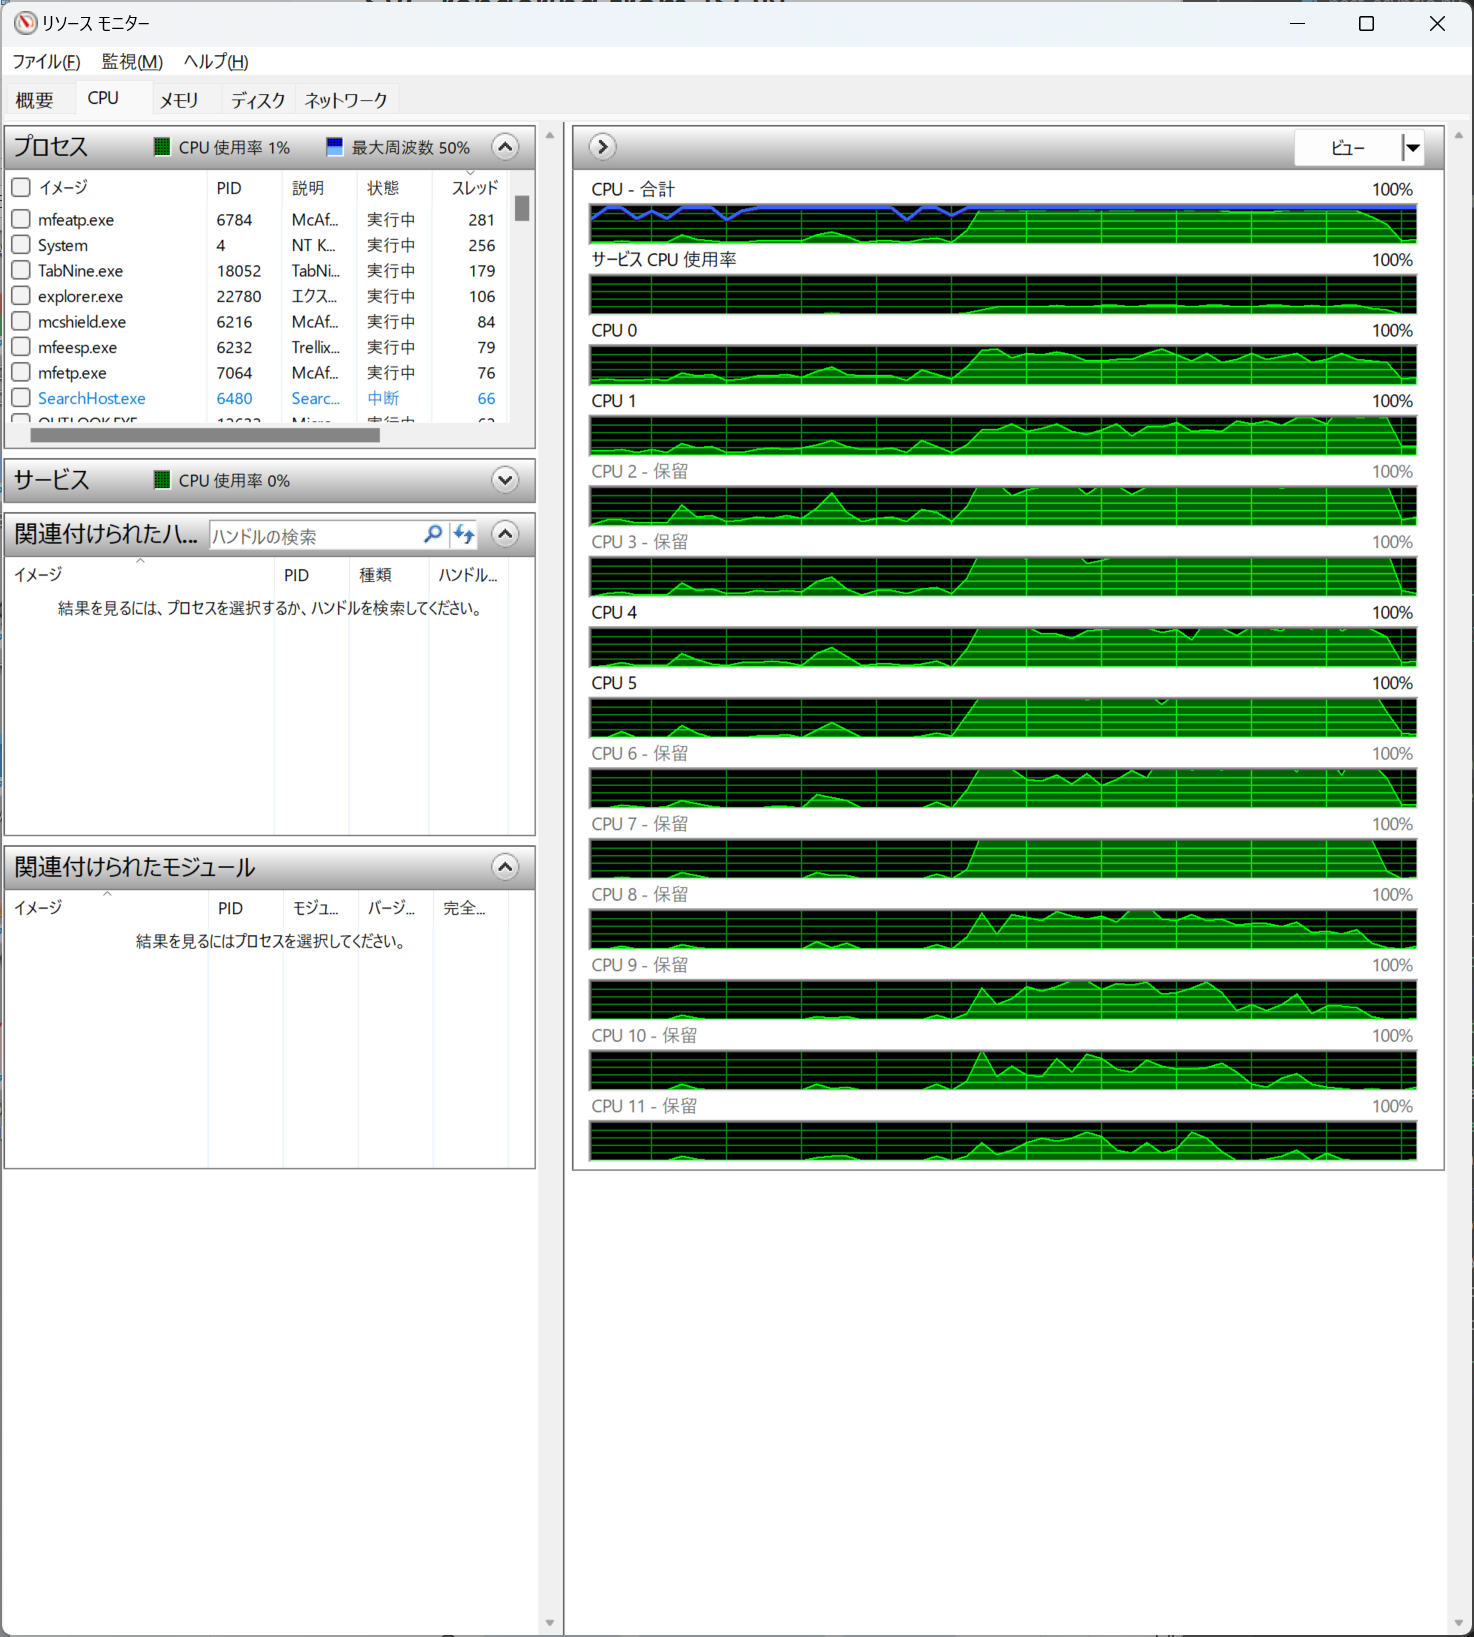
### CPU_COUNT = 5
TIMES = 100
N = 150
- スレッド制限なし
    - 8.044300556182861
    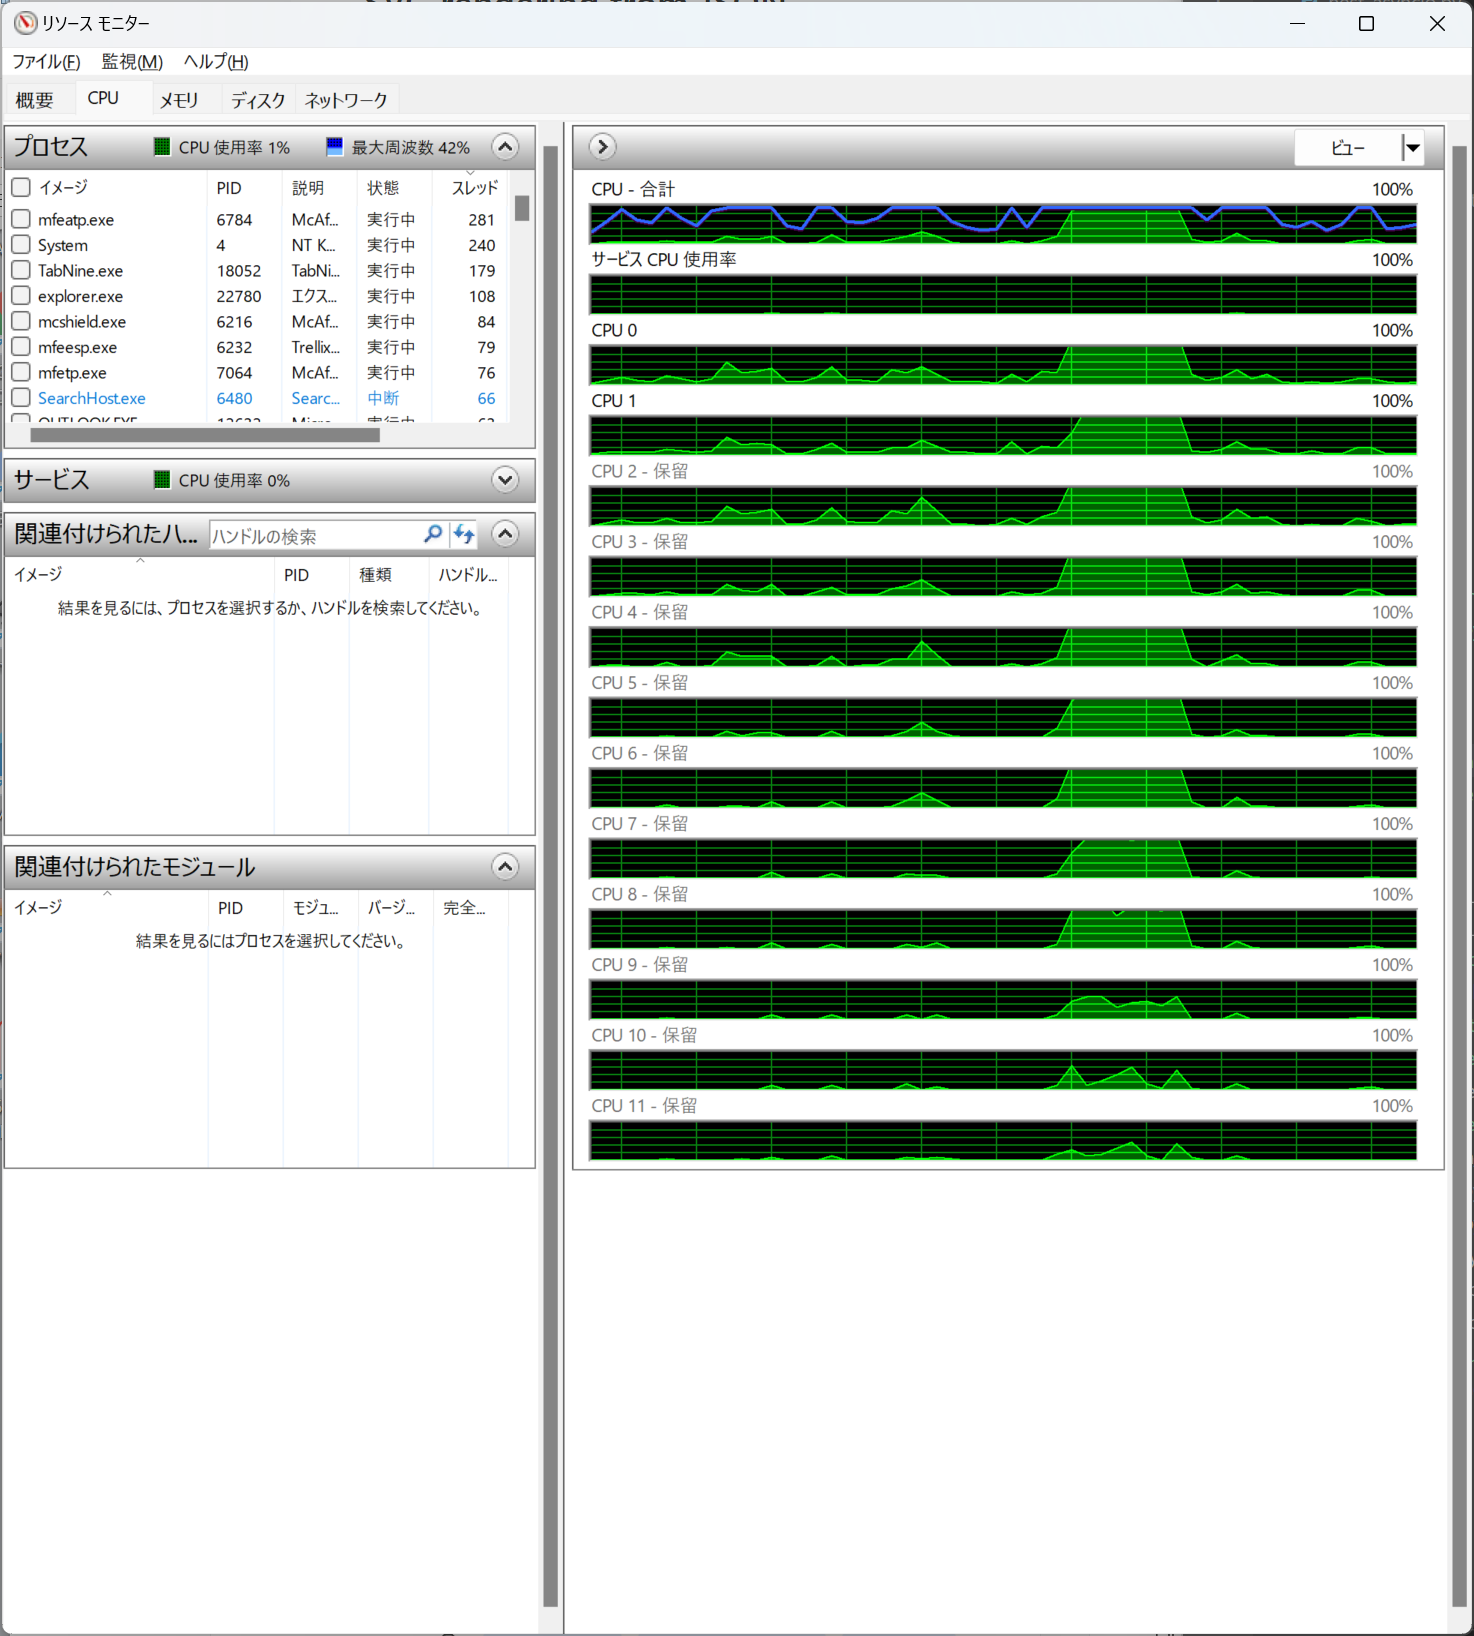
- スレッド制限あり　1スレッド
    - 3.1562139987945557
    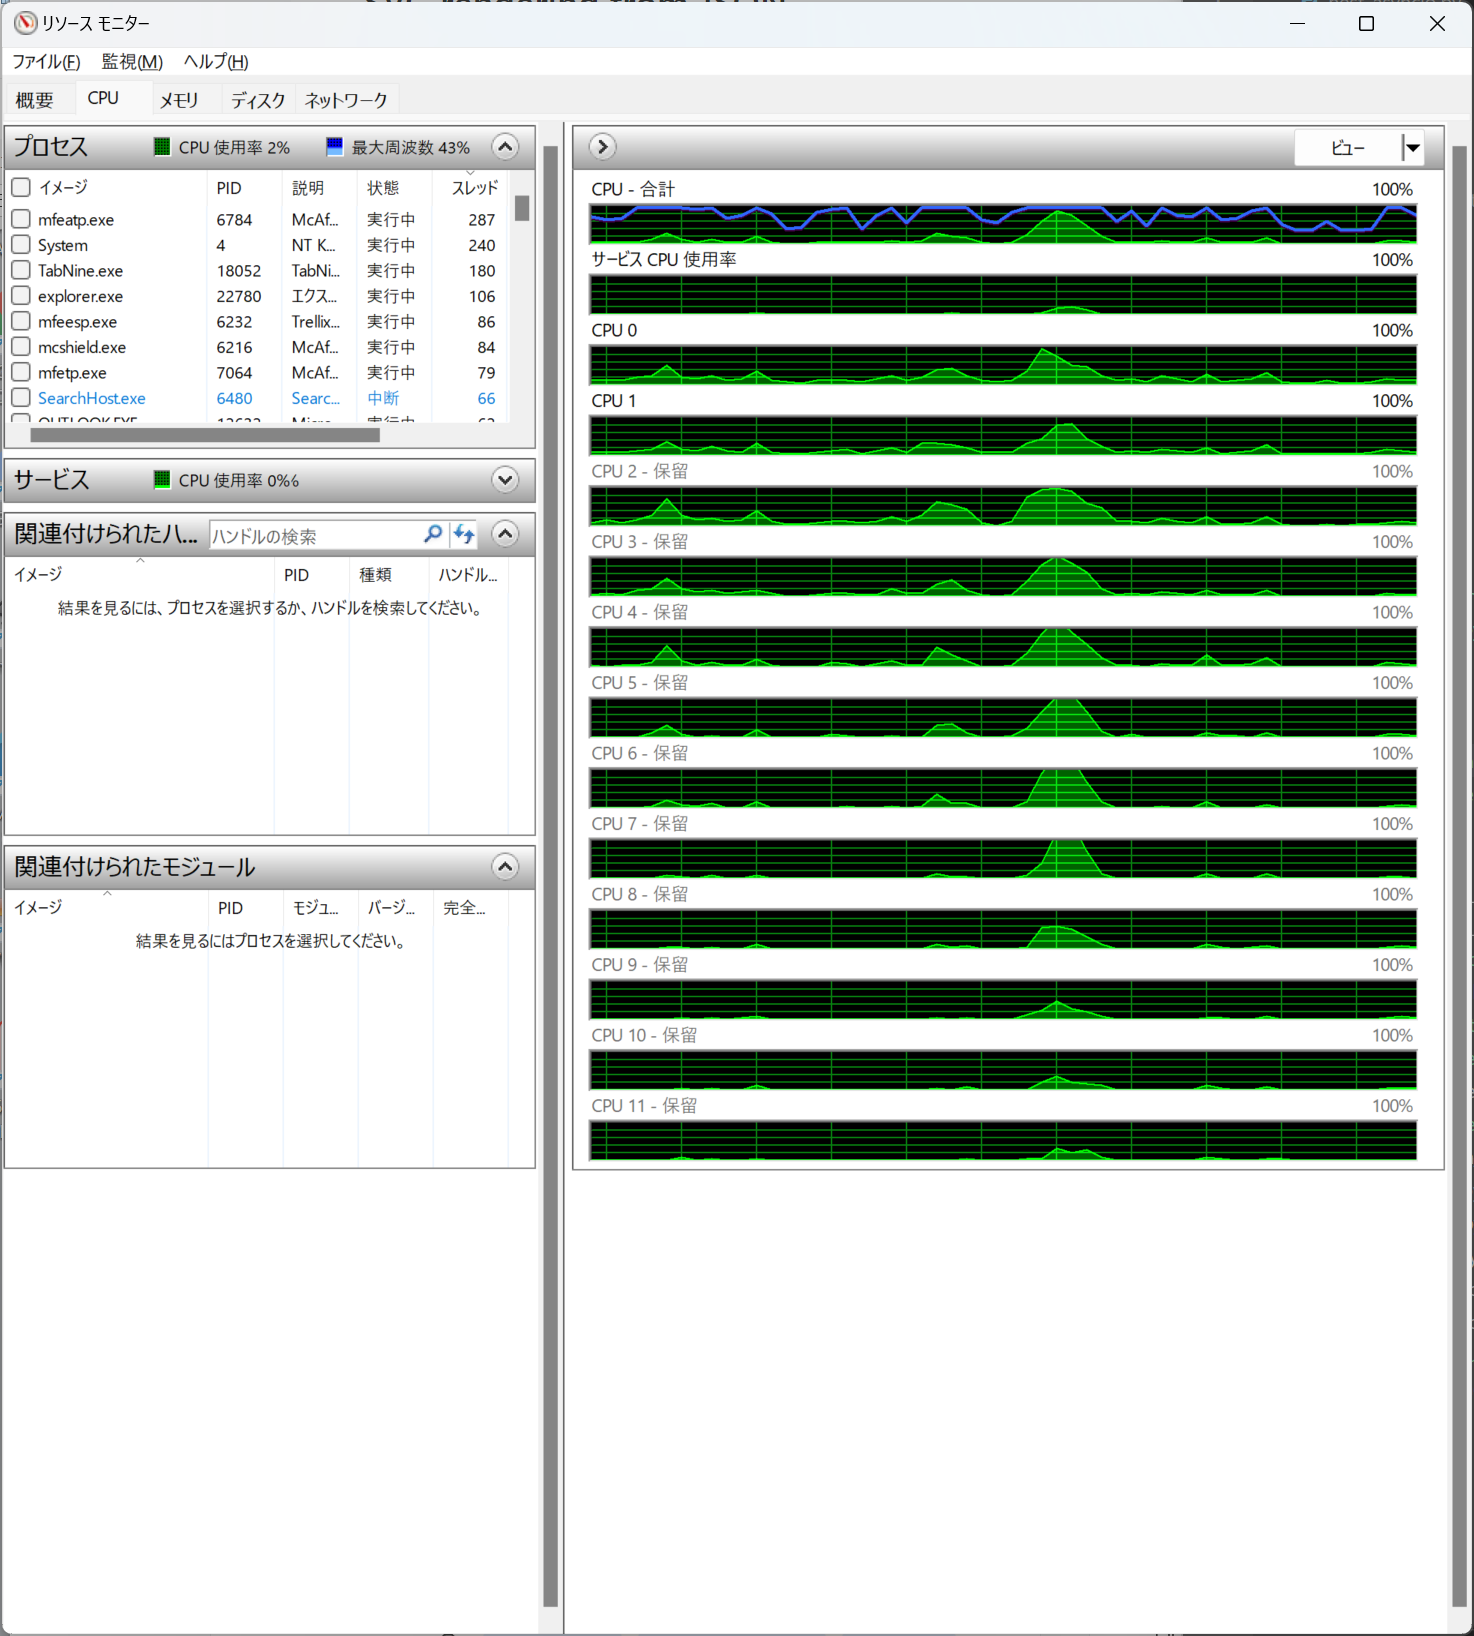



### environ['OMP_NUM_THREADS'] = 1・・・の定義位置
- 無し
#### 14.140887975692749
- import numpyの前
#### 5.789523124694824
- import numpyの後
#### 6.720056533813477

In [1]:
from joblib import Parallel, delayed
import time

import numpy as np

from process_cpubound_block_prevent_BLAS import wrap_calc
# set the number of threads for many common libraries
# from os import environ
# N_THREADS = '1'
# environ['OMP_NUM_THREADS'] = N_THREADS
# environ['OPENBLAS_NUM_THREADS'] = N_THREADS
# environ['MKL_NUM_THREADS'] = N_THREADS
# environ['VECLIB_MAXIMUM_THREADS'] = N_THREADS
# environ['NUMEXPR_NUM_THREADS'] = N_THREADS

CPU_COUNT = 6
TIMES = 100
N = 200
results = []

As_list = np.array_split([i for i in range(TIMES)], CPU_COUNT)
job_args = [(As, N) for As in As_list]
start = time.time()

for result in Parallel(n_jobs=CPU_COUNT) ([delayed(wrap_calc) (args) for args in job_args]):
    results.append(result)

print(time.time()-start)
print(results)


14.116792440414429
[[[0.0, 0.0, 0.0, 0.0, 0.0], [-2.1672743680991403e-12, 1.7305418392410496e-07, -0.005130442250551945, 67.14216934831913, 296132.92705078004], [-4.343919501051455e-12, 3.477013719177869e-07, -0.010349042008420226, 135.6288148110405, 604438.4378567376], [-6.6159610776585264e-12, 5.288388522817071e-07, -0.015631419105402722, 202.30956386111353, 903349.6830801148], [-8.647774278949911e-12, 6.952691660116519e-07, -0.020779016433781525, 272.35648539639624, 1187656.2979083795], [-1.0885477248367573e-11, 8.683672607998492e-07, -0.025747290630587345, 337.27425344006804, 1495148.0411759377], [-1.2975077225080843e-11, 1.0366964137655797e-06, -0.0308038485714687, 402.81695303533076, 1829336.03706612], [-1.5755883048034702e-11, 1.2560844273872322e-06, -0.03695041034782907, 476.9612261632759, 2087728.9716453922], [-1.7874721236908867e-11, 1.4406085293159053e-06, -0.04293355322784634, 558.7426219296018, 2344170.58391577], [-1.980065166748955e-11, 1.594706541642472e-06, -0.047650214

### BLASの制限
#### CPU_COUNT = 6
TIMES = 100
N = 200
- 無し  
14.0567946434021
- モジュールに記述  
5.729152679443359
- 呼び出しに記述  
5.6354029178619385
- モジュールの後に記述  
5.633916139602661
#### **記述位置は特に関係がなさそう**
> https://sgryjp.gitlab.io/posts/2020/2020-09-20/
> https://superfastpython.com/numpy-multithreaded-parallelism/?ck_subscriber_id=2095975775&utm_source=convertkit&utm_medium=email&utm_campaign=SuperFastPython+Newsletter%20-%2010577396



In [ ]:
import re
result = {}
keywords = ['CPU_COUNT', 'TIMES', 'N']
def assort_result(data):
    lines = data.split('\n')
    buf = {}
    for line in lines:
        print(line)
        
        for key in keywords:
            if re.search(f'{key} ', line):
                searched = re.search('= ([.\d]*)', line)
                print(searched.group(1))
                buf[key] = searched.group(1)
                print(f'buf in loop = {buf}')
        matched = re.match('[\.\d]+', line)
        if matched is not None :
            print(f'buf = {buf}')
            result[matched.group(0)] = buf
            buf = {}
    print(result)
    result_keys = result.keys()
    print(result_keys)
    for key in result_keys:
        print(key, end=',')
        for keyword in keywords:
            print(result[key][keyword], end=',')
        print(end='\n')
        
        
data = '''- CPU_COUNT = 1
TIMES = 100
N = 120
56.57072305679321
- CPU_COUNT = 2
TIMES = 100
N = 120
16.48804497718811
- CPU_COUNT = 4
TIMES = 100
N = 120
5.196465015411377
- CPU_COUNT = 6
TIMES = 100
N = 120
3.4273998737335205
- CPU_COUNT = 8
TIMES = 100
N = 120
1.829620599746704
- CPU_COUNT = 10
TIMES = 100
N = 120
2.0630264282226562
- CPU_COUNT = 12
TIMES = 100
N = 120
2.358685255050659
- CPU_COUNT = 6
TIMES = 100
N = 150
7.114055156707764
- CPU_COUNT = 8
TIMES = 100
N = 150
2.6081085205078125
- CPU_COUNT = 2
TIMES = 24
N = 200
16.646991968154907
- CPU_COUNT = 4
TIMES = 24
N = 200
5.842790842056274
![image.png](attachment:image-2.png)
- CPU_COUNT = 4
TIMES = 25
N = 200
6.3791663646698
- CPU_COUNT = 5
TIMES = 24
N = 200
![image.png](attachment:image-3.png)
- CPU_COUNT = 6
TIMES = 24
N = 200
4.0602357387542725
![image.png](attachment:image.png)
- CPU_COUNT = 6
TIMES = 25
N = 200
4.516061782836914
- CPU_COUNT = 7
TIMES = 24
N = 200
2.1445112228393555
- CPU_COUNT = 8
TIMES = 24
N = 200
2.207643508911133
- CPU_COUNT = 10
TIMES = 24
N = 200
2.3841946125030518
- CPU_COUNT = 12
TIMES = 24
N = 200
2.6013553142547607'''
assort_result(data)

In [ ]:
import re
matched = re.match('[\d\.]+','23.5TIMES = 24')
print(matched)
print(matched.group(0))
